In [ ]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all" 
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import statistics as stt
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import re
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)
pd.options.display.max_rows

C:\Users\Admin\AppData\Local\Temp/ipykernel_17540/2468422413.py:16: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


Lưu ý: Pipeline: -> Nhập dl -> Vẽ boxplot, distribution -> Điền missing -> Phân tích (Phân tích trước để đo lường sự thay đổi của thời gian) -> Xử lý Outlier (điền khuyết nội suy để tạo ra một điểm bình thường) -> Phân tích tiếp -> ANOVA (X) thay vào đó là có thể là sử dụng một cái gì đó để select thuộc tính -> Xây dựng mô hình

# Read Data

In [ ]:
# Download dữ liệu từ drive cá nhân
!pip install gdown
!gdown --id 1MCYM580zJvYdQJEF-vVZrML0NhvgJU_z

Downloading...
From: https://drive.google.com/uc?id=1MCYM580zJvYdQJEF-vVZrML0NhvgJU_z
To: /content/final_data.csv
100% 2.37M/2.37M [00:00<00:00, 76.0MB/s]


In [ ]:
data=pd.read_csv(r'final_data.csv',index_col=0) # Sau khi thực hiện download dữ liệu sẽ được hiện trong workspace

In [ ]:
data.sample(5) # 5 dòng dữ liệu bất kỳ

,Time,Country Name,Region,"Population, total",Population Structure,Population growth,"Unemployment, total (% of total labor force) (modeled ILO estimate)","Labor force, total",Life expectancy index,Life expectancy at birth (Times),HDI,Highest GDP contribution industry rate,Industry has the highest employment contribution rate,"Agriculture, forestry, and fishing, value added (annual % growth)","Industry (including construction), value added (annual % growth)","Services, value added (annual % growth)","Manufacturing, value added (annual % growth)",Gross value added at basic prices (GVA) (current US$),Total natural resources rents (% of GDP),"Inflation, GDP deflator (annual %)",GNI growth (annual %),Adjusted savings (% of GNI),"Stocks traded, total value (% of GDP)",Broad money (% of GDP),Consumer price index (2010 = 100),Net ODA received (% of GNI),"Foreign direct investment, net inflows (% of GDP)","Official exchange rate (LCU per US$, period average)","Total reserves (includes gold, current US$)","Central government debt, total (% of GDP)",Trade (% of GDP),Lending interest rate (%),Deposit interest rate (%),Import value index (2000 = 100),Type has the highest manufacturing contribution rate,Type has the highest service import contribution rate,Type has the highest commercial service import contribution rate,Type has the highest merchandise import contribution rate,Export value index (2000 = 100),Type has the highest service export contribution rate,Type has the highest merchandise export contribution rate,Type has the highest commercial service export contribution rate,Education Index,Documents,H index,Expected Times of schooling (Times),Mean Times of schooling (Times),GDP growth (annual %)
2265,2010,Israel,Middle East & North Africa,7623600.0,Old,1-2,8.48,3495104.0,0.946,81.5,Very High,Services,Services,-9.596193,12.490942,3.131622,13.991601,2.087131e+11,0.169499,1.559974,6.147888,gross savings,46.253027,74.516348,100.000000,NaN,2.984914,3.738975,7.090731e+10,NaN,67.646614,NaN,NaN,162.418405,Other manufacturing,"Communications, computer, etc","Communications, computer and other service",Manufactures,186.003872,"Communications, computer, etc",Manufactures,"Communications, computer and other service",0.860,18045.0,786.0,15.8,12.6,5.580246
2642,2012,Chad,Sub-Saharan Africa,12784748.0,Young,+3,1.73,4695491.0,0.491,51.9,Low,"Agriculture, forestry, and fishing",Agriculture,11.792639,8.492845,6.509371,12.221076,1.232506e+10,26.588727,1.097246,9.018744,natural resources depletion,NaN,12.420870,109.698395,3.937207,4.688089,510.556338,1.155659e+09,NaN,80.575620,NaN,3.2500,883.280757,NaN,NaN,NaN,NaN,2622.950820,NaN,NaN,NaN,0.278,25.0,47.0,7.5,2.1,8.882576
1051,2004,Martinique,Latin America & Caribbean,33187.0,NaN,+3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.0,56.0,NaN,NaN,NaN
2117,2009,San Marino,Europe & Central Asia,30825.0,NaN,1-2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.999377,NaN,education expenditure,NaN,NaN,97.479741,NaN,NaN,0.716958,7.902719e+08,46.607401,NaN,5.7425,0.9625,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,44.0,NaN,NaN,-10.320957
1221,2005,Namibia,Sub-Saharan Africa,1938316.0,Young,1-2,21.98,657741.0,0.476,50.9,Low,Services,Services,14.980231,0.325708,2.133218,7.545876,6.642520e+09,1.202855,5.598082,0.018948,gross savings,0.076155,37.782580,71.405037,1.590417,5.378444,6.377117,3.121049e+08,NaN,80.680380,10.6100,6.2400,166.315406,NaN,Transport services,Transport services,Manufactures,156.759991,Travel services,Manufactures,Travel services,0.516,125.0,114.0,11.4,6.0,2.529263


# Basic info

In [ ]:
# Sô dòng số cột
data.shape

(4557, 48)

In [ ]:
# Thông tin các cột thuộc tính
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4557 entries, 0 to 4556
Data columns (total 48 columns):
 #   Column                                                               Non-Null Count  Dtype  
---  ------                                                               --------------  -----  
 0   Time                                                                 4557 non-null   int64  
 1   Country Name                                                         4557 non-null   object 
 2   Region                                                               4557 non-null   object 
 3   Population, total                                                    4548 non-null   float64
 4   Population Structure                                                 4065 non-null   object 
 5   Population growth                                                    4548 non-null   object 
 6   Unemployment, total (% of total labor force) (modeled ILO estimate)  3927 non-null   float64
 7   Labor 

In [ ]:
# Chuyển đổi các ký hiệu missing data như '?', '??', ... sang nan.
data.replace(to_replace=['?','??','.','..','','_','nan','Na','NULL','null','not','Not'], value= np.nan, inplace=True)

<Figure size 1440x720 with 0 Axes>

<AxesSubplot:xlabel='Features', ylabel='% Missing Values'>

Text(0.5, 1.0, '% Missing Values')

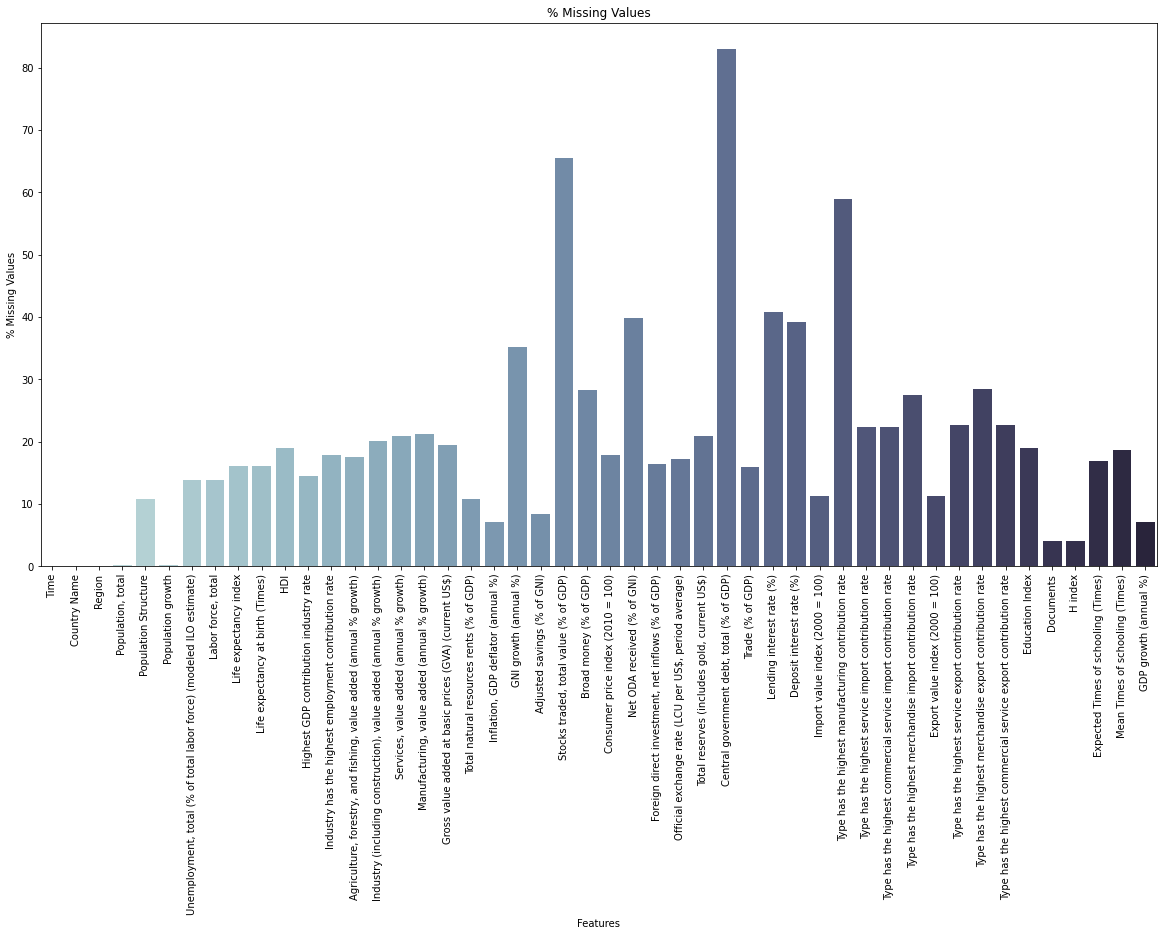

In [ ]:
# Thống kê % số lượng bị khuyết giá trị trong mỗi thuộc tính
missing=list((data.isna().sum()/len(data.index))*100)
feature=list(data.columns)

plt.figure(figsize=(20,10))
sns.barplot(data=pd.DataFrame(list(zip(feature, missing)),columns=['Features','% Missing Values']),x='Features',y='% Missing Values',palette='ch:start=.2,rot=-.3')
plt.tick_params(axis='x', rotation=90)
plt.title('% Missing Values')

# EDA cơ bản

In [ ]:
# Chia dữ liệu ra làm 2 dataframe chỉ gồm các thuộc tính liên tục hoặc phân loại
data_numeric=data.select_dtypes(exclude=object)

data_cate=data.select_dtypes(include=object)

In [ ]:
# Hế số tượng quan các thuộc tính số với thuộc tính target là 'GDP growth (annual %)'
data[data.columns[1:]].corr()['GDP growth (annual %)'][:-1]

Population, total                                                      0.074741
Unemployment, total (% of total labor force) (modeled ILO estimate)   -0.106138
Labor force, total                                                     0.073004
Life expectancy index                                                 -0.123827
Life expectancy at birth (Times)                                      -0.123863
Agriculture, forestry, and fishing, value added (annual % growth)      0.267088
Industry (including construction), value added (annual % growth)       0.612896
Services, value added (annual % growth)                                0.688623
Manufacturing, value added (annual % growth)                           0.333321
Gross value added at basic prices (GVA) (current US$)                 -0.058206
Total natural resources rents (% of GDP)                               0.155311
Inflation, GDP deflator (annual %)                                    -0.015430
GNI growth (annual %)                   

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0.5, 1.0, 'Population, total')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0.5, 1.0, 'Unemployment, total (% of total labor force) (modeled ILO estimate)')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0.5, 1.0, 'Labor force, total')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0.5, 1.0, 'Life expectancy index')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0.5, 1.0, 'Life expectancy at birth (Times)')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0.5, 1.0, 'Agriculture, forestry, and fishing, value added (annual % growth)')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0.5, 1.0, 'Industry (including construction), value added (annual % growth)')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0.5, 1.0, 'Services, value added (annual % growth)')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0.5, 1.0, 'Manufacturing, value added (annual % growth)')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0.5, 1.0, 'Gross value added at basic prices (GVA) (current US$)')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0.5, 1.0, 'Total natural resources rents (% of GDP)')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0.5, 1.0, 'Inflation, GDP deflator (annual %)')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0.5, 1.0, 'GNI growth (annual %)')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0.5, 1.0, 'Stocks traded, total value (% of GDP)')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0.5, 1.0, 'Broad money (% of GDP)')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0.5, 1.0, 'Consumer price index (2010 = 100)')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0.5, 1.0, 'Net ODA received (% of GNI)')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0.5, 1.0, 'Foreign direct investment, net inflows (% of GDP)')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0.5, 1.0, 'Official exchange rate (LCU per US$, period average)')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0.5, 1.0, 'Total reserves (includes gold, current US$)')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0.5, 1.0, 'Central government debt, total (% of GDP)')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0.5, 1.0, 'Trade (% of GDP)')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0.5, 1.0, 'Lending interest rate (%)')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0.5, 1.0, 'Deposit interest rate (%)')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0.5, 1.0, 'Import value index (2000 = 100)')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0.5, 1.0, 'Export value index (2000 = 100)')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0.5, 1.0, 'Education Index')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0.5, 1.0, 'Documents')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0.5, 1.0, 'H index')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0.5, 1.0, 'Expected Times of schooling (Times)')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0.5, 1.0, 'Mean Times of schooling (Times)')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0.5, 1.0, 'GDP growth (annual %)')

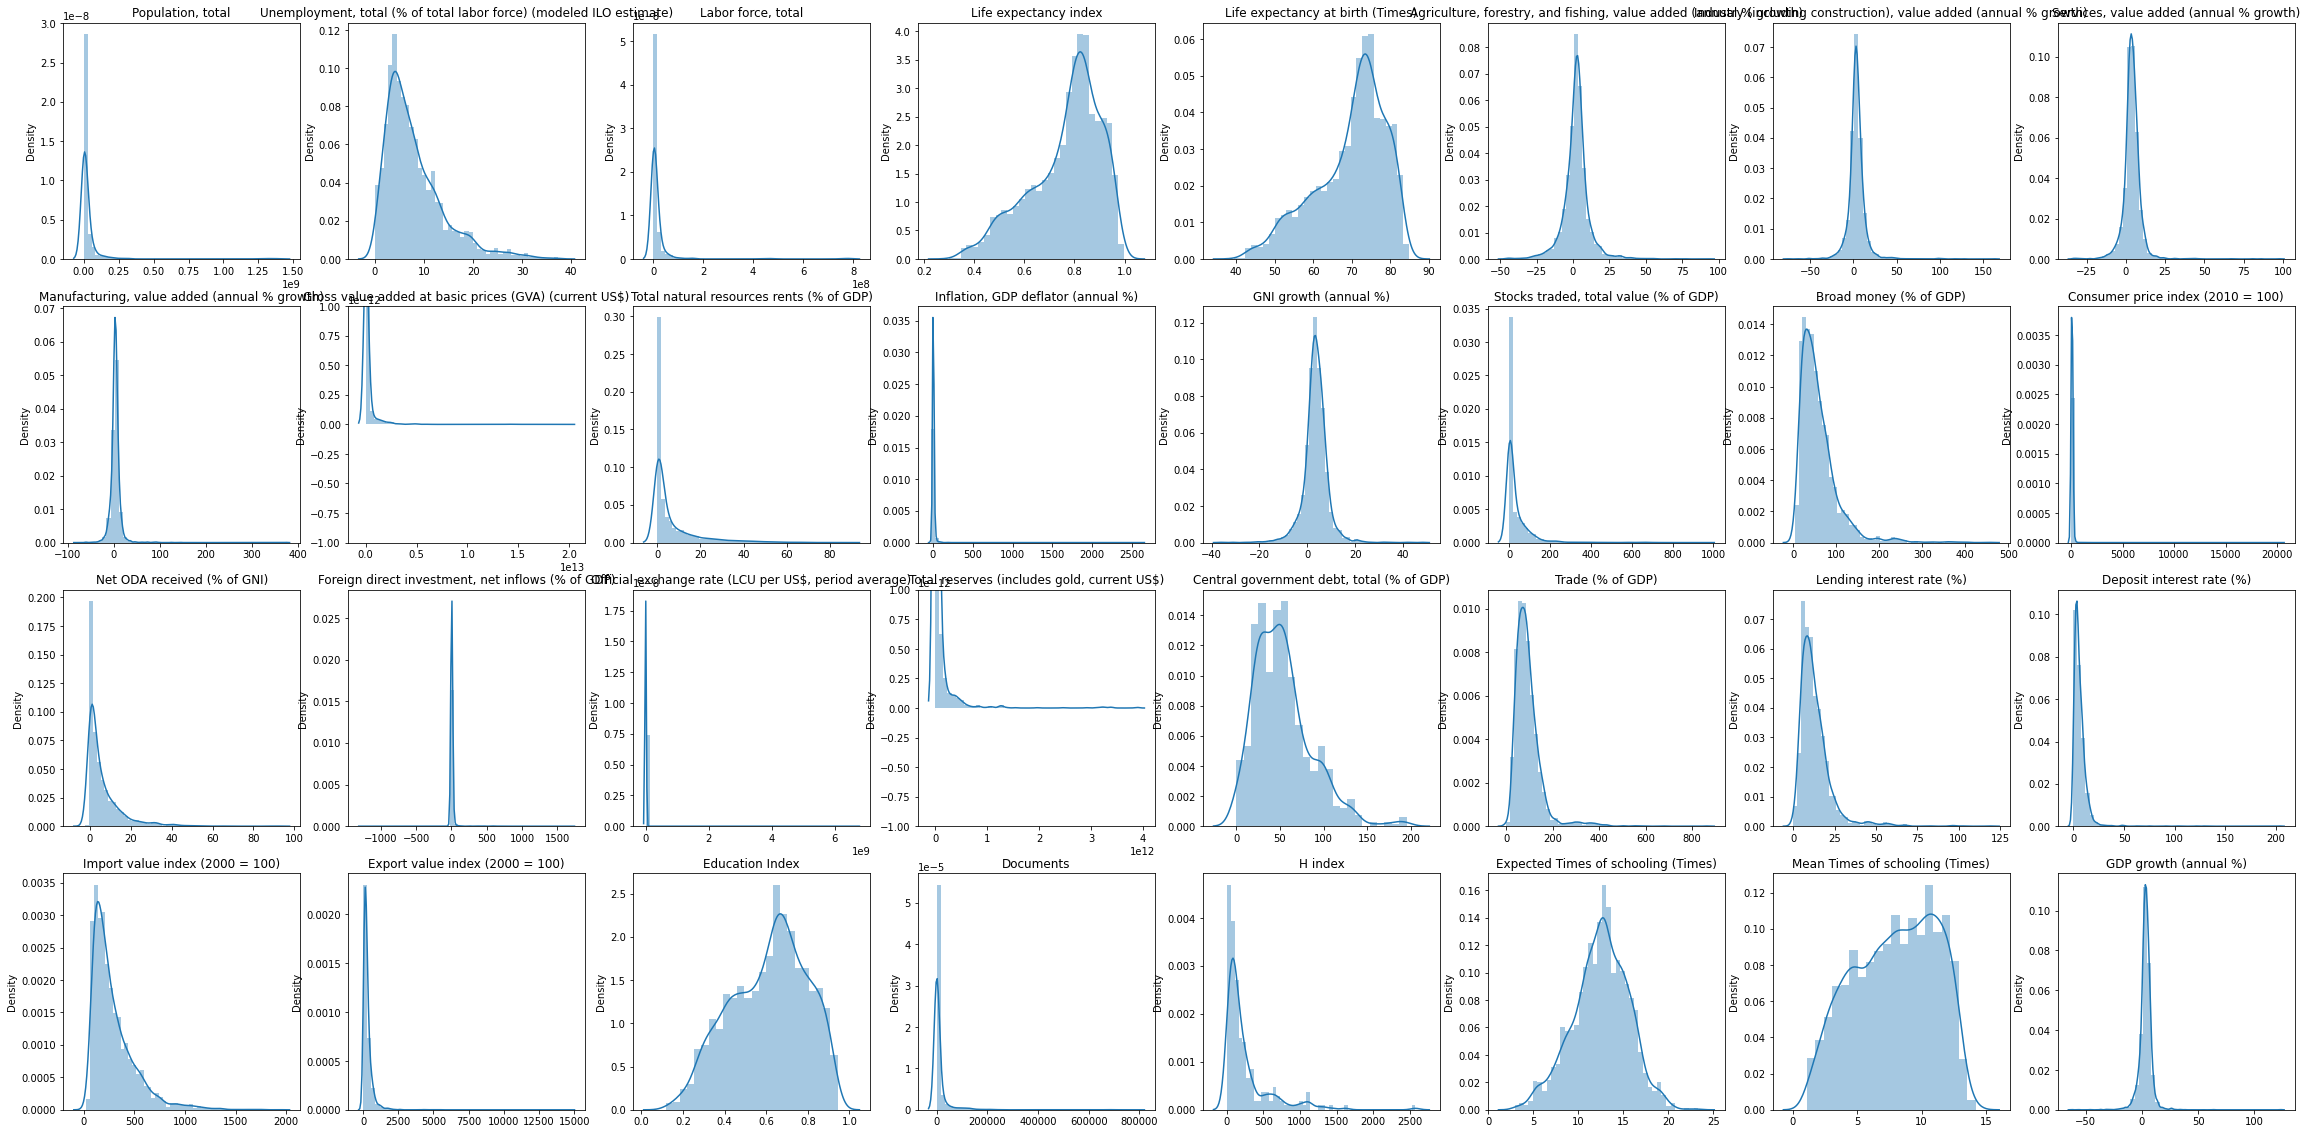

In [ ]:
# Distribution plot
feature_list=list(data_numeric)[1:]
k=0
fig, axs = plt.subplots(4,8,figsize=(40,20))
for i in range (0,4):
    for j in range (0,8):
            sns.distplot(ax=axs[i,j],label=str(feature_list[k]),x=data_numeric[feature_list[k]])
            axs[i,j].set_title(feature_list[k])
            k+=1

plt.show()

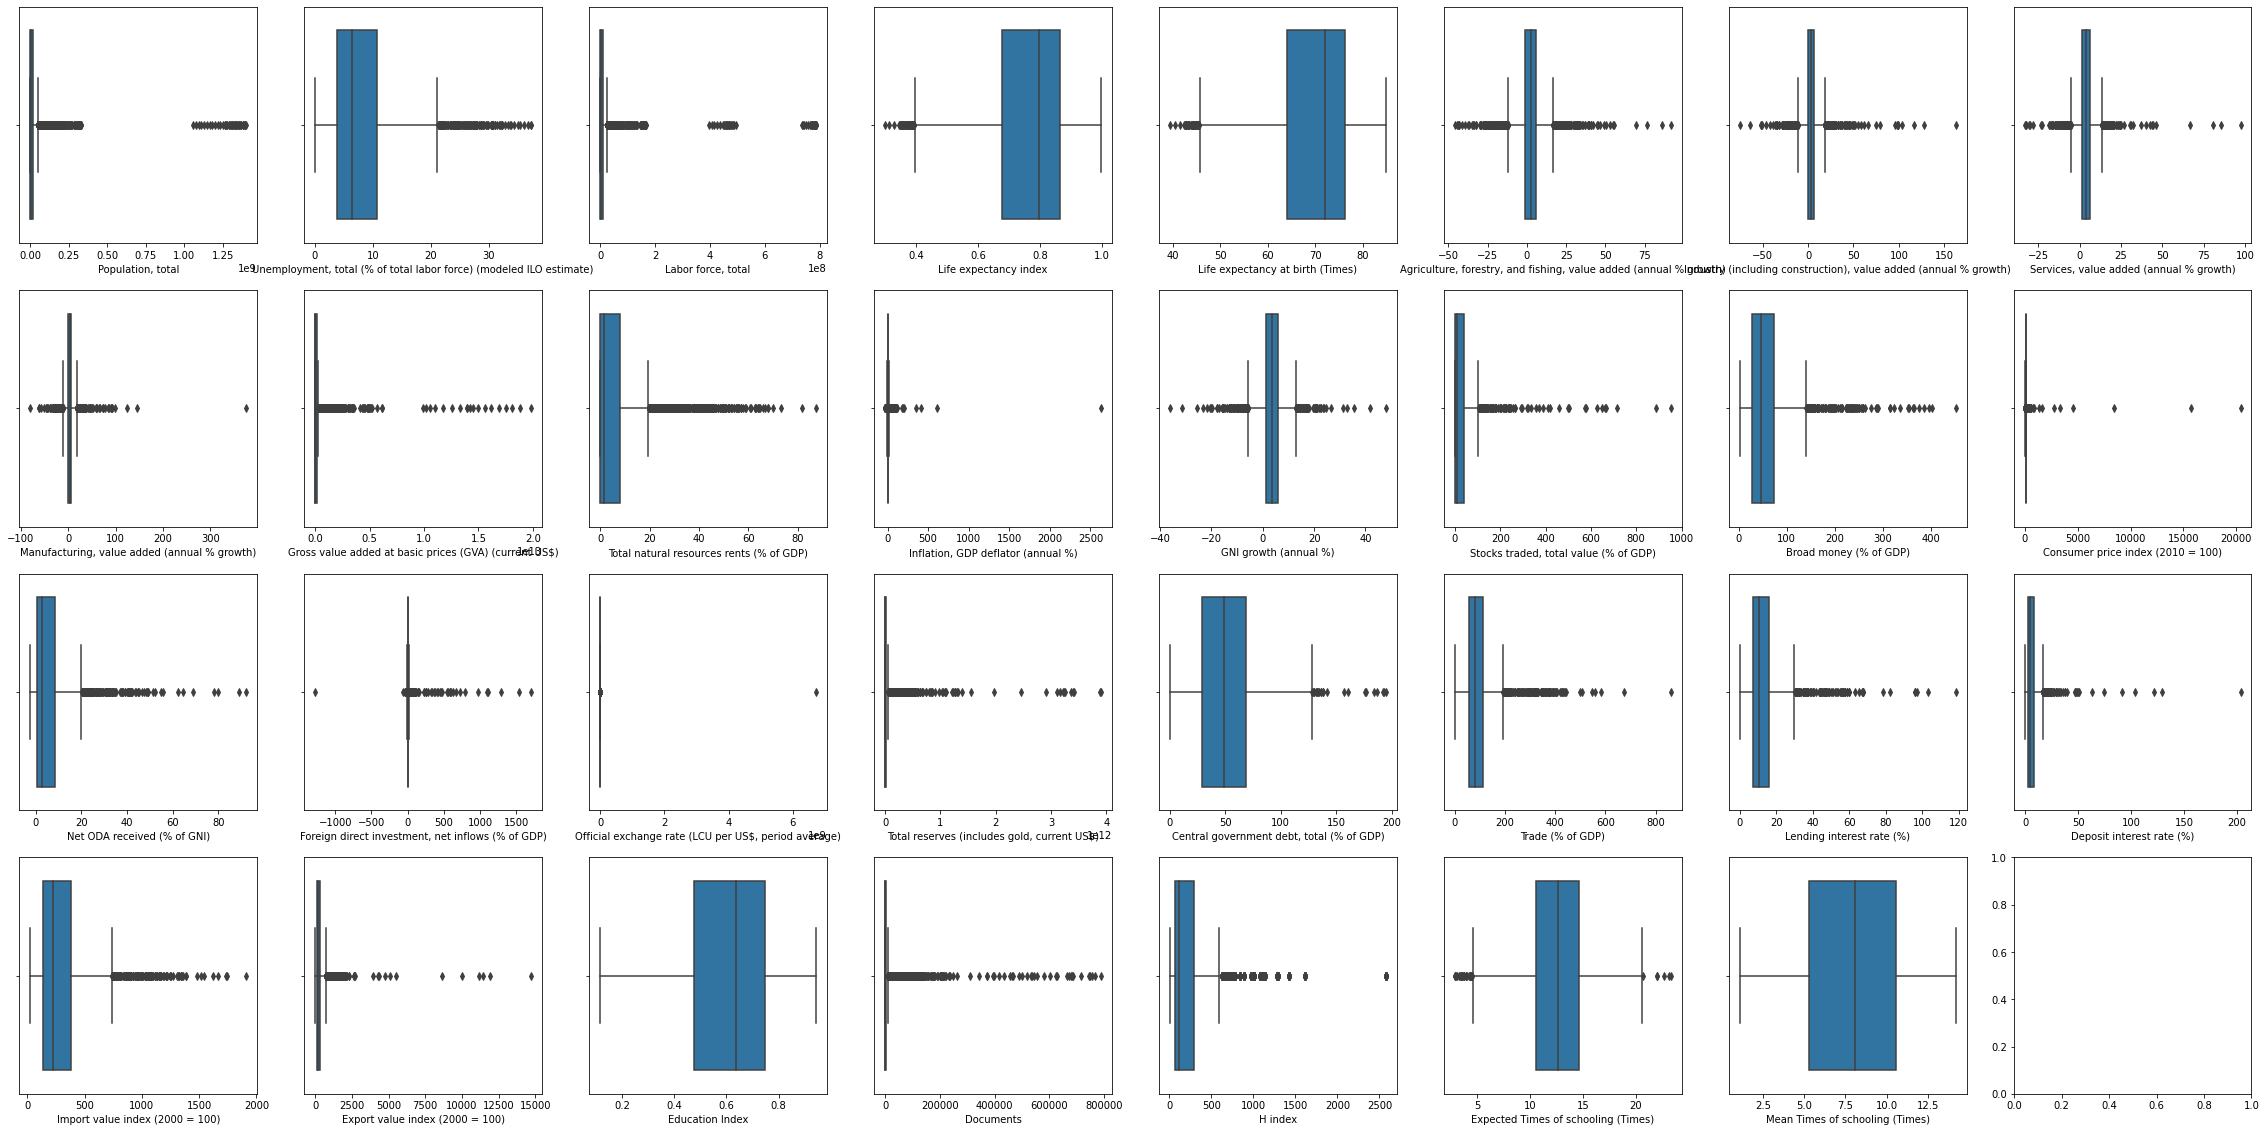

In [ ]:
# Box plot các thuộc tính số
feature_list=list(data_numeric)[1:]
k=0
fig, axs = plt.subplots(4,8,figsize=(40,20))
for i in range (0,4):
    for j in range (0,8):
        if k!=31:
            sns.boxplot(ax=axs[i,j],data=data_numeric,x=feature_list[k])
            k+=1

plt.show()

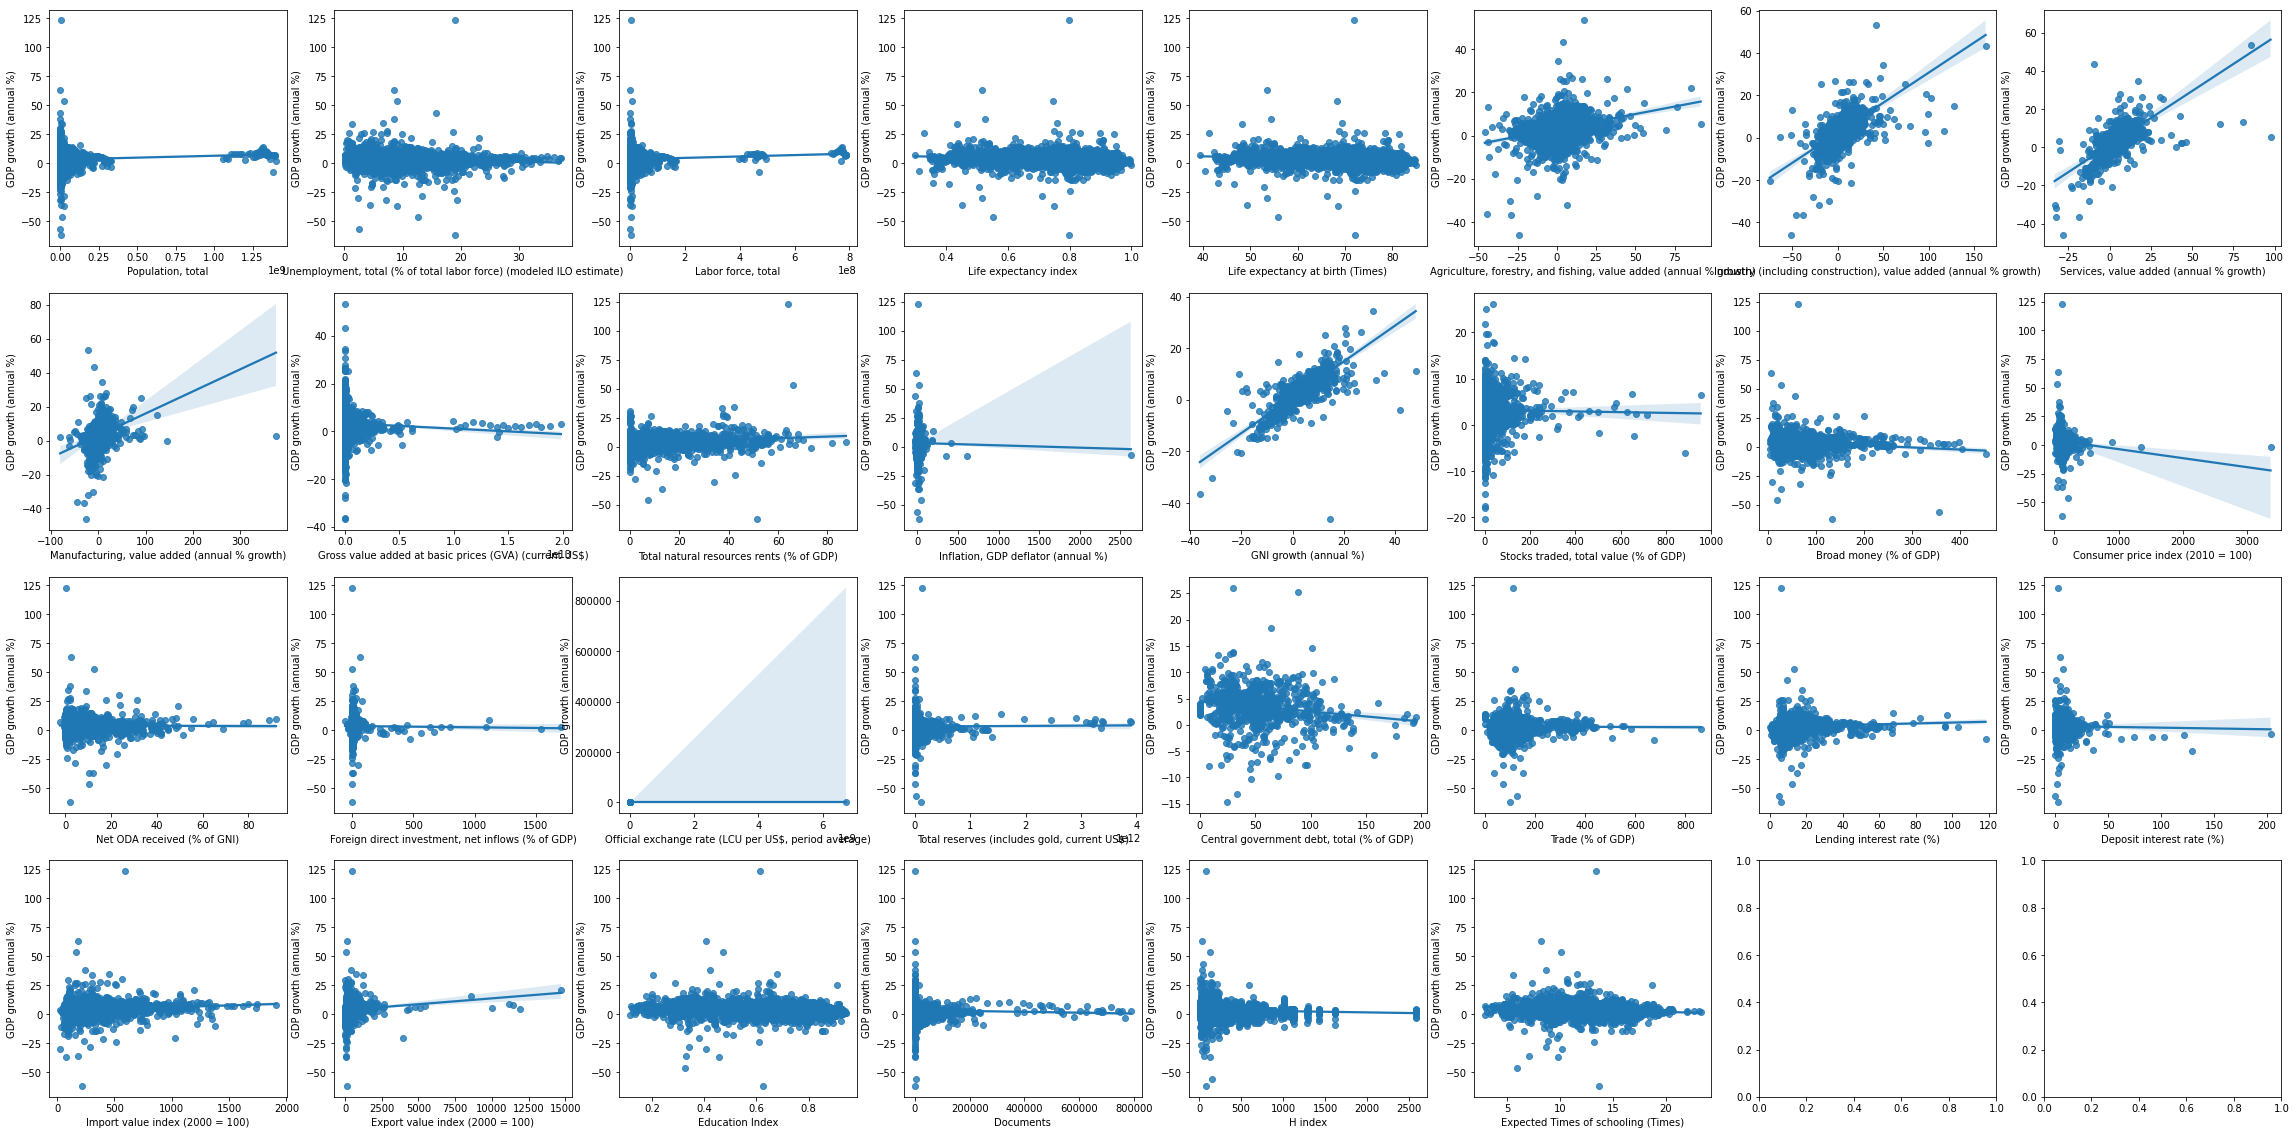

In [ ]:
# regression plot với biến target là GDP growth (annual %)
feature_list=list(data_numeric)[1:]
k=0
fig, axs = plt.subplots(4,8,figsize=(40,20))
for i in range (0,4):
    for j in range (0,8):
        if k<30:
            sns.regplot(data=data_numeric,x=feature_list[k],y='GDP growth (annual %)',ax=axs[i,j])
            k+=1

plt.show()

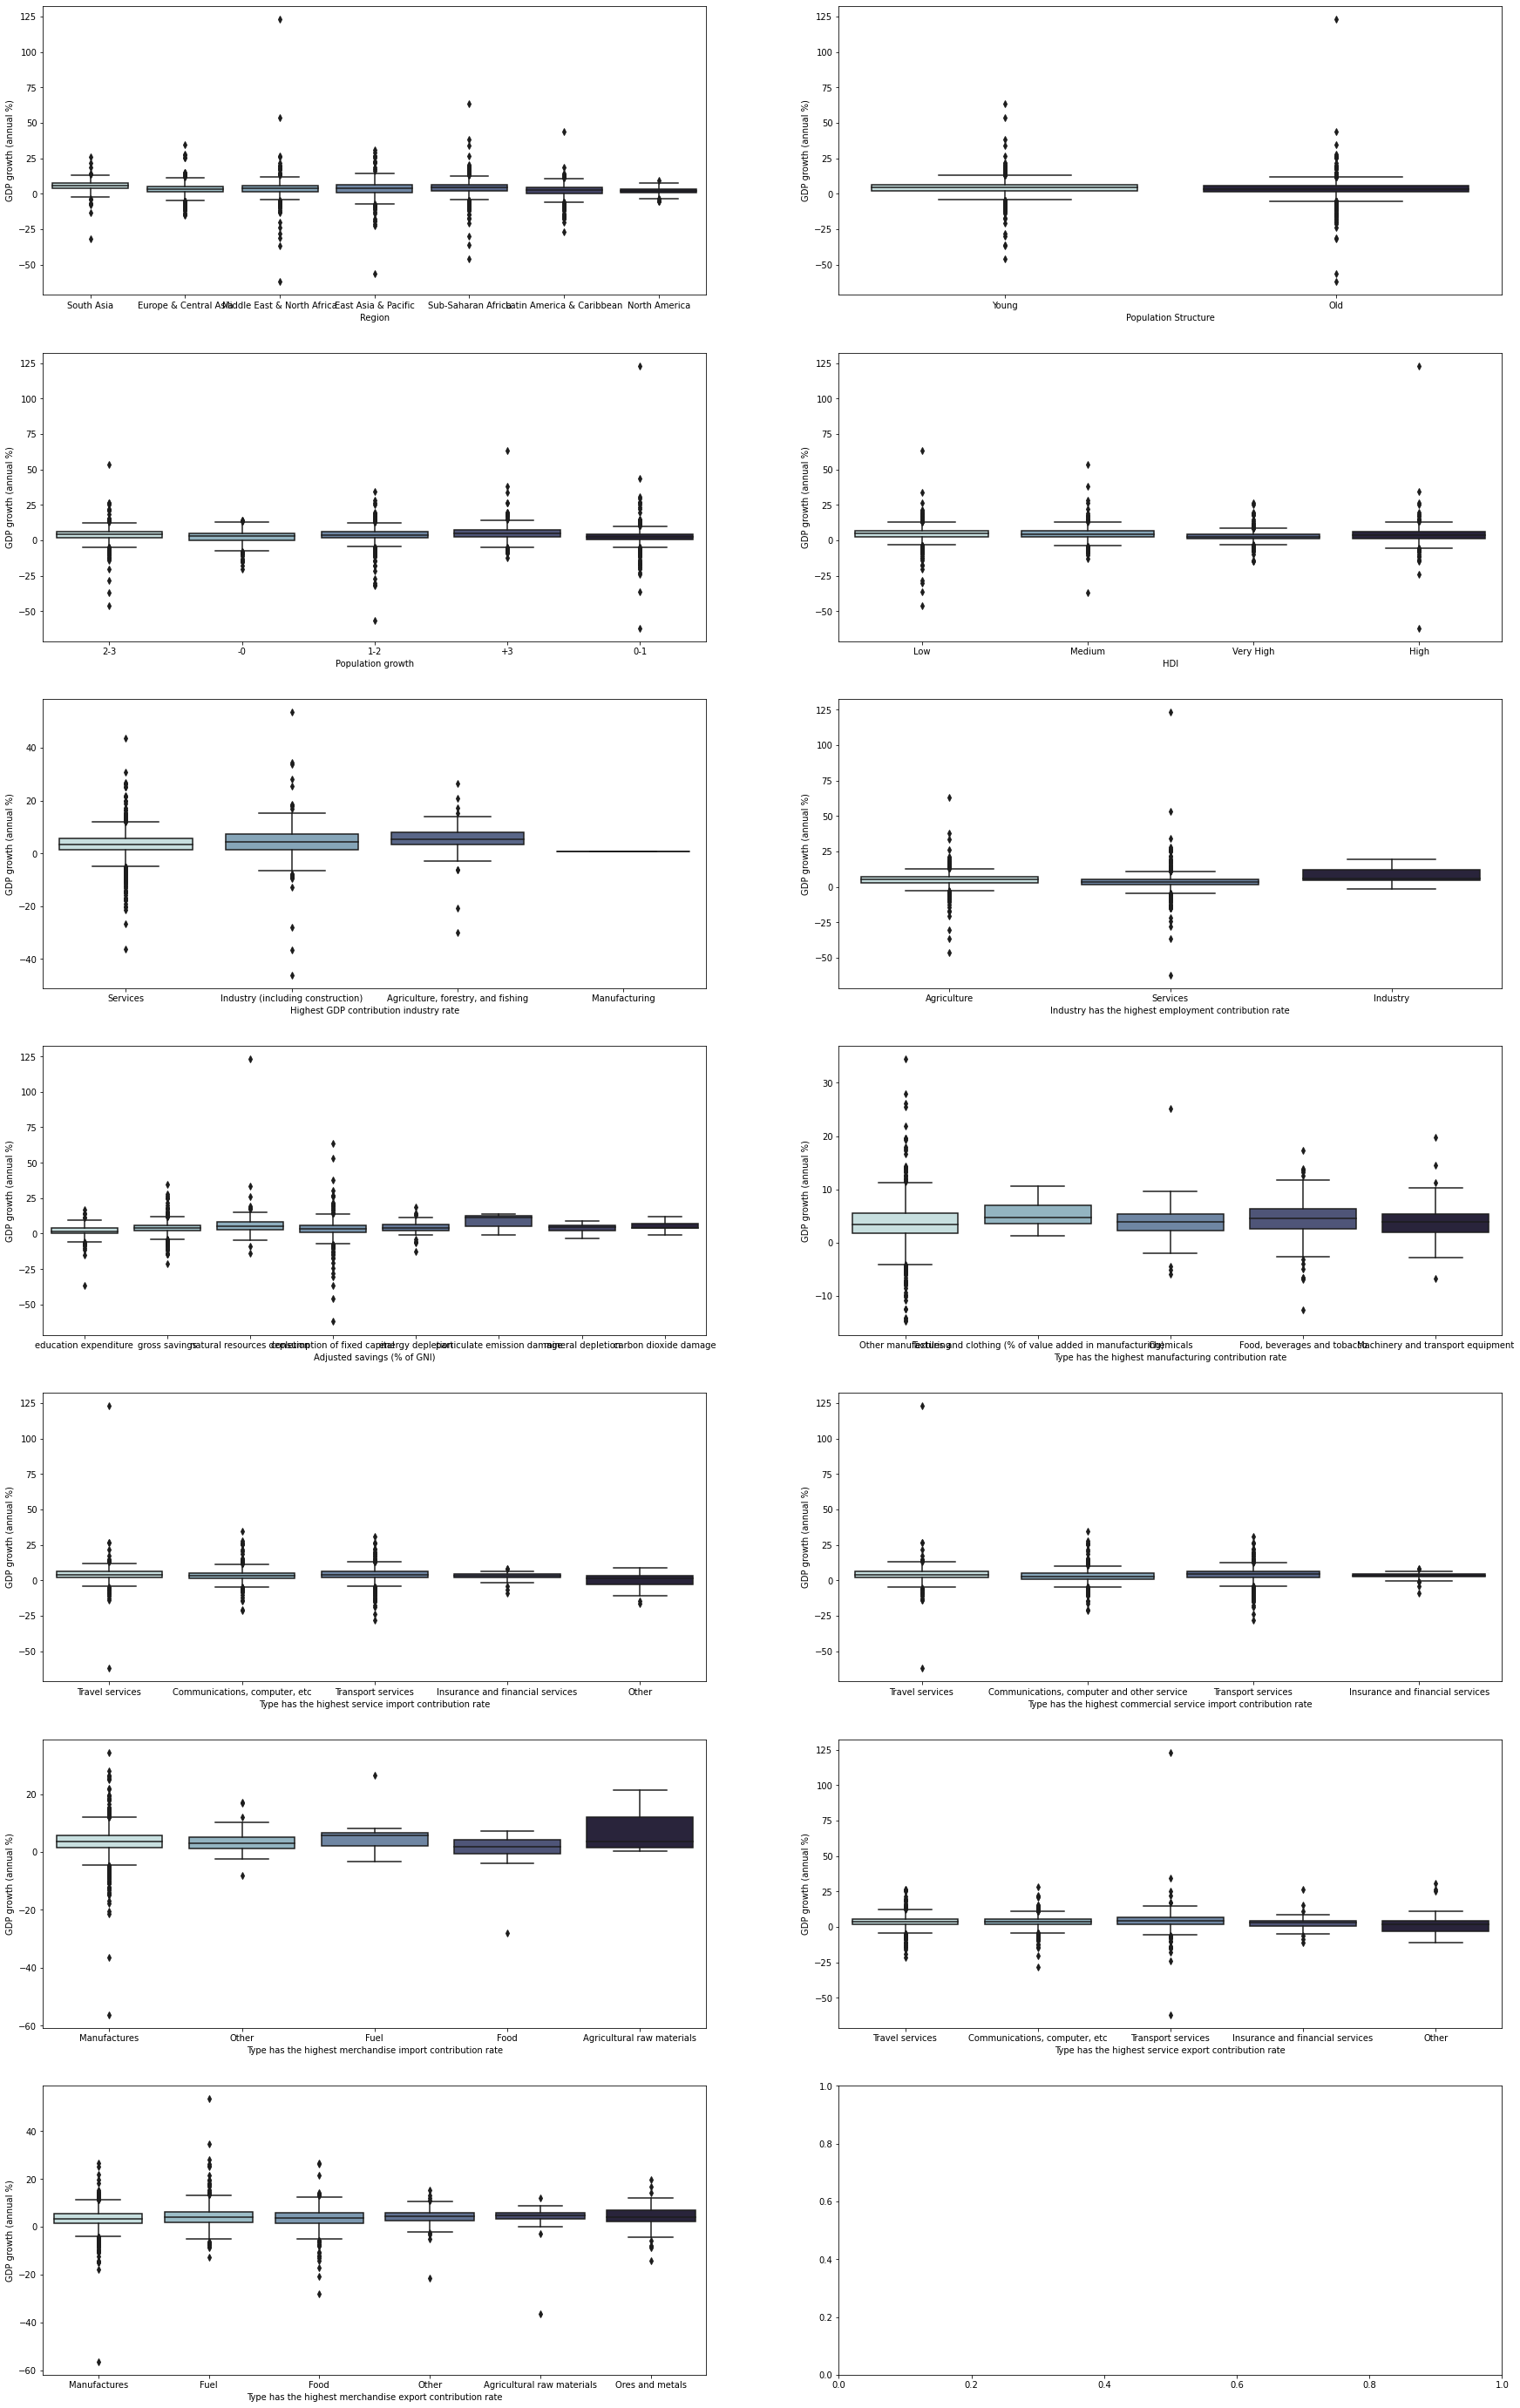

In [ ]:
# box plot với các thuộc tính phân loại
feature_list=list(data_cate)[1:]
k=0
fig, axs = plt.subplots(7,2,figsize=(30,50))
for i in range (0,7):
    for j in range (0,2):
        if k<13:
            sns.boxplot(x=data_cate[feature_list[k]],y=data_numeric['GDP growth (annual %)'],ax=axs[i,j],palette='ch:start=.2,rot=-.3')
            k+=1

plt.show()

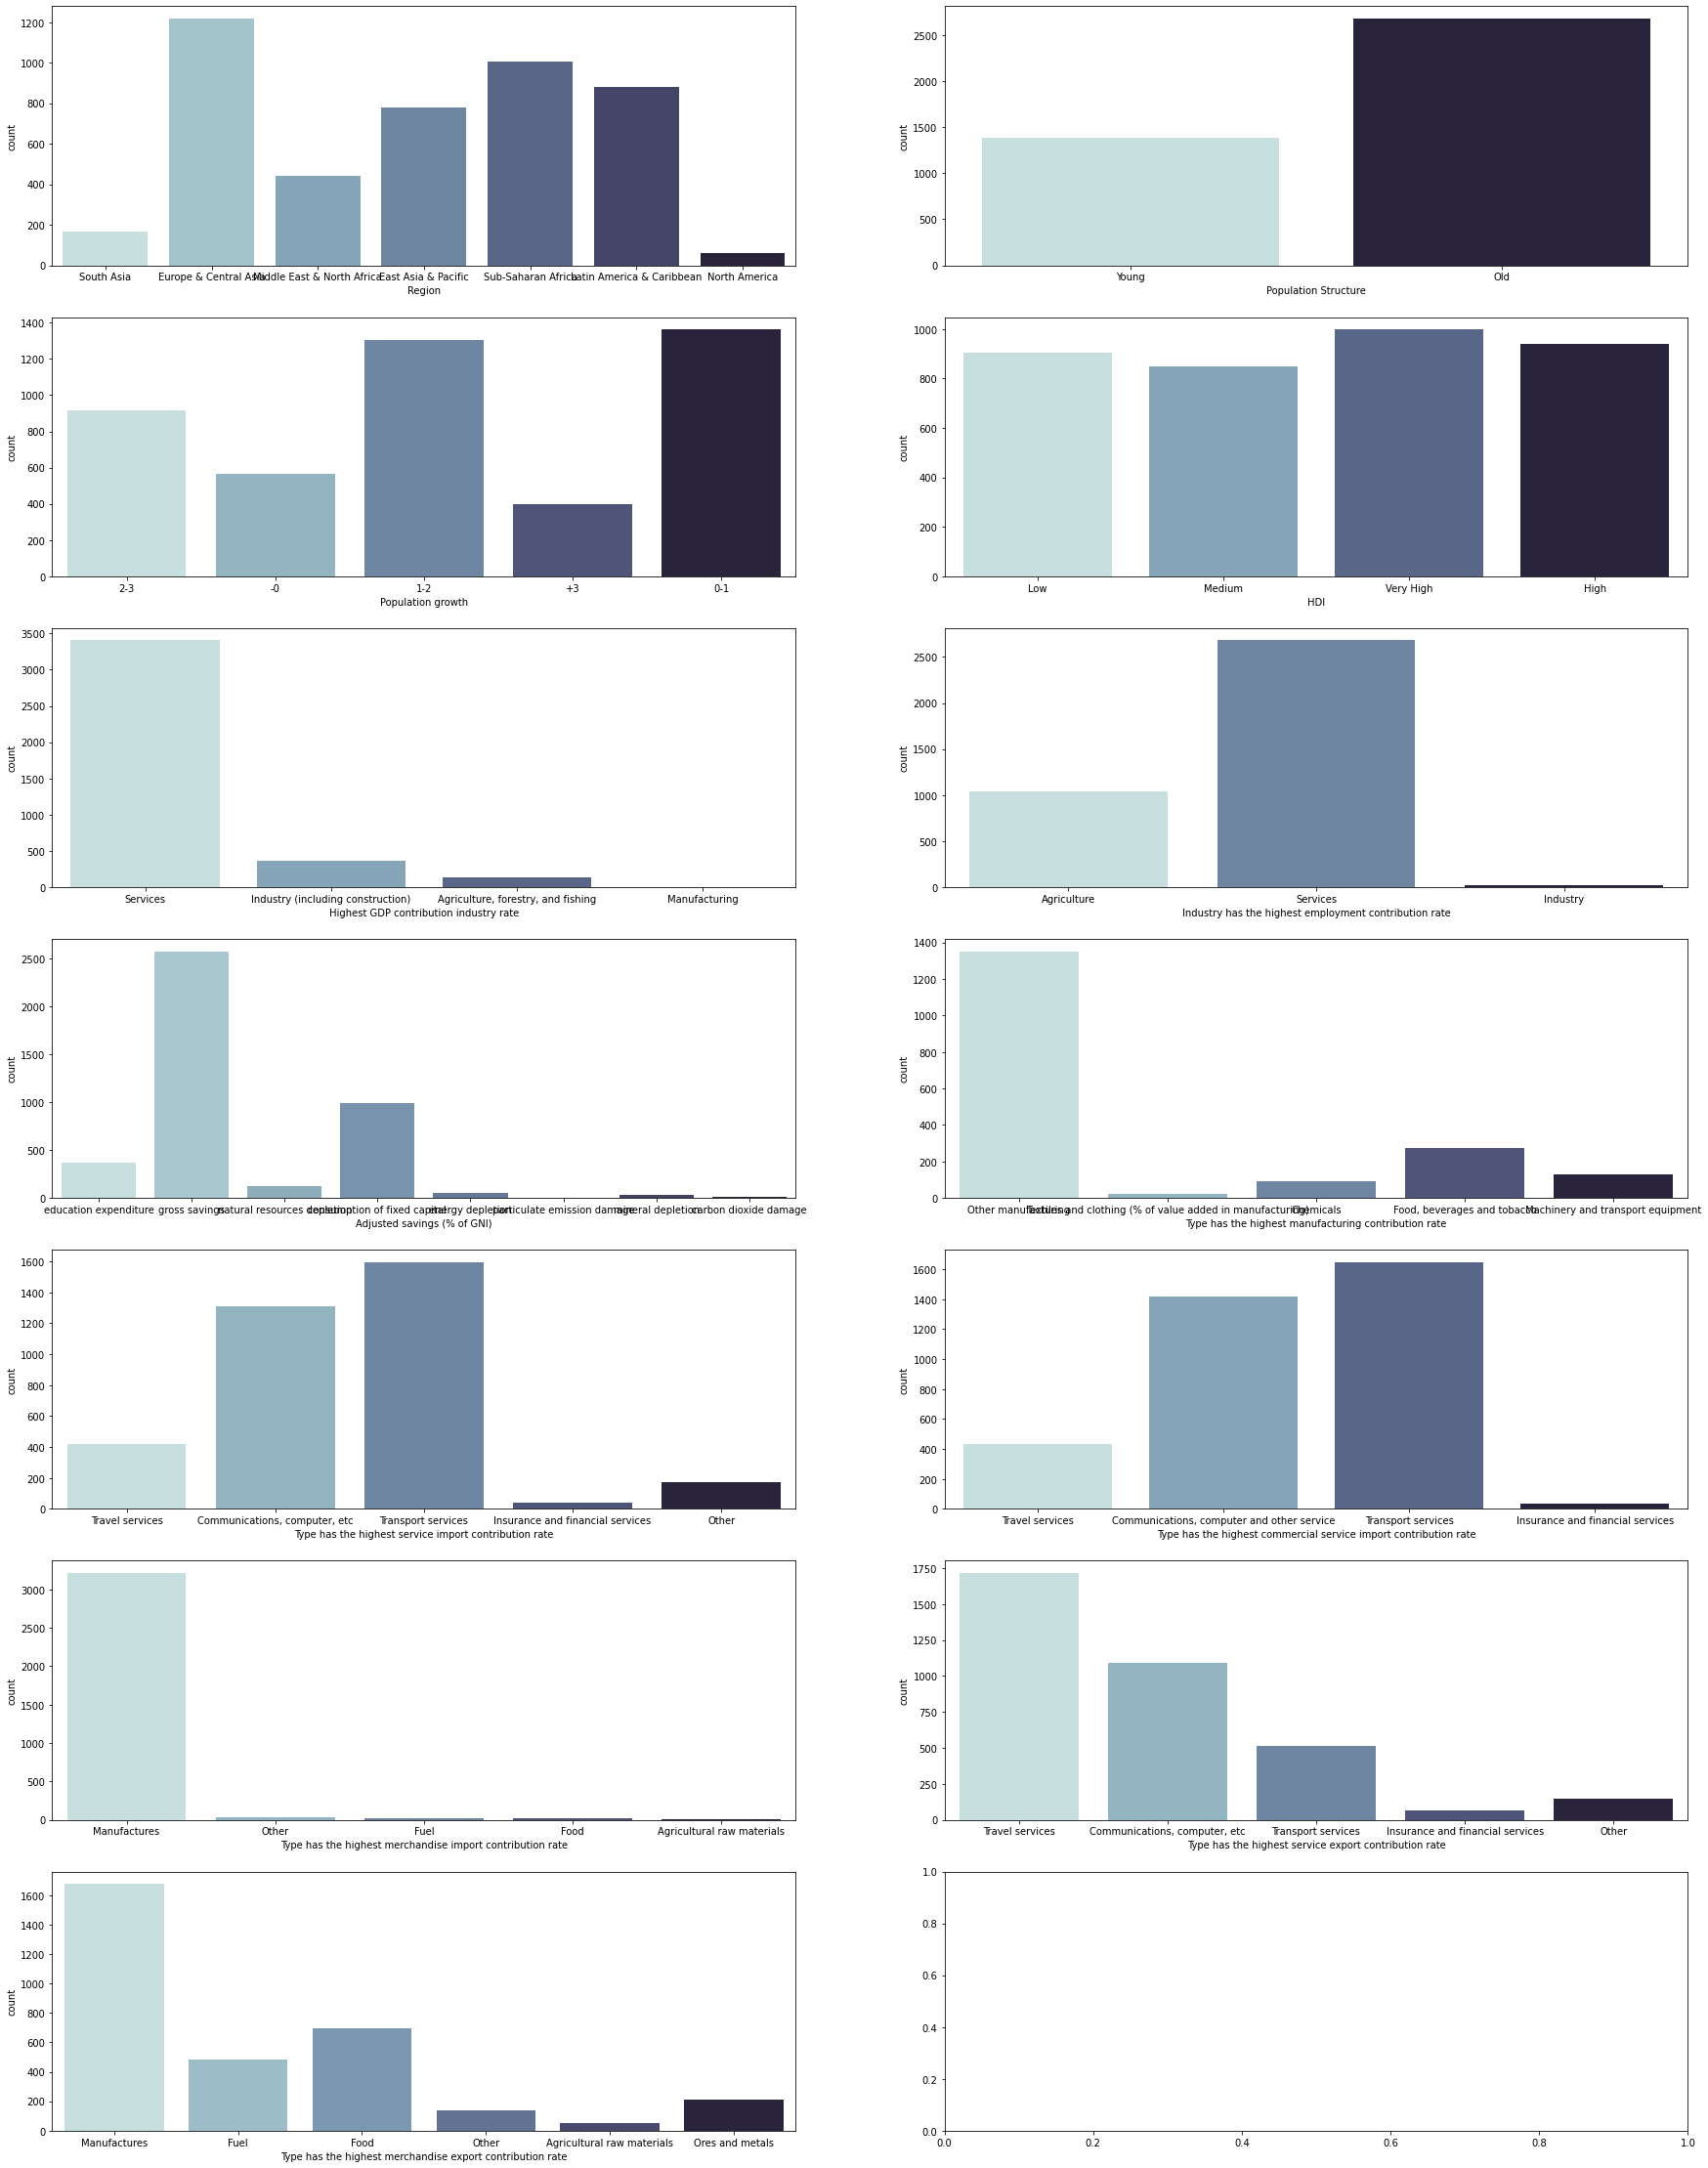

In [ ]:
# count plot với các giá trị có trong các biến phân loại
feature_list=list(data_cate)[1:]
k=0
fig, axs = plt.subplots(7,2,figsize=(30,40))
for i in range (0,7):
    for j in range (0,2):
        if k<13:
            sns.countplot(x=feature_list[k],data=data_cate,ax=axs[i,j],palette='ch:start=.2,rot=-.3')
            k+=1

plt.show()

# Data Cleansing (Fill Missing Values) - Step 3

In [ ]:
data_c=data.copy()

### Loại bỏ cột và các quốc gia chứa nhiều giá trị missing

In [ ]:
# Loại bỏ các cột có missing nhiều (trên 2/3 số lượng bị mất) (chưa chắc cần lập luận thêm để chứng minh)
for i in data_c.columns:
    if data_c[i].isna().sum()/len(data.index)*100>75:
        data_c.drop(i,axis=1,inplace=True)

In [ ]:
# Loại bỏ các nước có số lượng missing nhiều
arr=[]
for i in data['Country Name'].unique():
    count=0
    for j in data_c.loc[data_c['Country Name']==i,].isna().sum()/21*100:
        if j>=50:
            count+=1
    if (count>=23):
        arr.append(i)
        arr.append(count)
        data_c.drop(data_c[data_c['Country Name'] == i].index, inplace = True)
        print(i)


American Samoa
Andorra
Bermuda
Virgin Islands (British)
Cayman Islands
Channel Islands
Curacao
Faroe Islands
French Polynesia
Gibraltar
Greenland
Guam
Isle of Man
North Korea
Liechtenstein
Monaco
Nauru
New Caledonia
Northern Mariana Islands
Puerto Rico
San Marino
Sint Maarten (Dutch part)
Somalia
Republic of South Sudan
Martinique
Turks and Caicos Islands
Tuvalu
Virgin Islands (U.S.)


### Numeric Features

In [ ]:
# Điền tay thuộc tính population, total cho nước Eritrea
for i in range(2012,2021):
    if (i==2012):
        data_c.loc[np.logical_and(data_c['Time']==i,data_c['Country Name']=='Eritrea'),'Population, total']=3250000
    if (i==2013):
        data_c.loc[np.logical_and(data_c['Time']==i,data_c['Country Name']=='Eritrea'),'Population, total']=3280000
    if (i==2014):
        data_c.loc[np.logical_and(data_c['Time']==i,data_c['Country Name']=='Eritrea'),'Population, total']=3311000
    if (i==2015):
        data_c.loc[np.logical_and(data_c['Time']==i,data_c['Country Name']=='Eritrea'),'Population, total']=3342818
    if (i==2016):
        data_c.loc[np.logical_and(data_c['Time']==i,data_c['Country Name']=='Eritrea'),'Population, total']=3376557
    if (i==2017):
        data_c.loc[np.logical_and(data_c['Time']==i,data_c['Country Name']=='Eritrea'),'Population, total']=3412893
    if (i==2018):
        data_c.loc[np.logical_and(data_c['Time']==i,data_c['Country Name']=='Eritrea'),'Population, total']=3452786
    if (i==2019):
        data_c.loc[np.logical_and(data_c['Time']==i,data_c['Country Name']=='Eritrea'),'Population, total']=3497117	
    if (i==2020):
        data_c.loc[np.logical_and(data_c['Time']==i,data_c['Country Name']=='Eritrea'),'Population, total']=3546421

In [ ]:
def handle_missing_numeric (data_c):
    # Điền missing (bằng phép nội suy)
    for i in data_c['Country Name'].unique():
        print(i)
        data_c.update(data_c.loc[data_c['Country Name']==i,].interpolate(method='linear', inplace=False, limit_direction='both', limit_area='inside'))

    # Điền missing bằng phương pháp KNN với neighbors=5
    data_c=data_c.reset_index(drop=True) # Reset index 
    data_numeric=data_c.select_dtypes(exclude=object).drop(columns=['Population, total']) # Lựa chọn các thuộc tính số

    from sklearn.impute import KNNImputer
    imputer = KNNImputer(n_neighbors=5)
    data_numeric = pd.DataFrame(imputer.fit_transform(data_numeric),columns = data_numeric.columns)

    for i in data_c.select_dtypes(exclude=object).drop(columns=['Population, total']):
        data_c[i].update(data_numeric[i]) # update dữ liệu sau khi được điền

    return data_c
    

In [ ]:
data_c=handle_missing_numeric(data_c)

Afghanistan
Albania
Algeria
Angola
Antigua and Barbuda
Argentina
Armenia
Aruba
Australia
Austria
Azerbaijan
Bahamas
Bahrain
Bangladesh
Barbados
Belarus
Belgium
Belize
Benin
Bhutan
Bolivia
Bosnia and Herzegovina
Botswana
Brazil
Brunei Darussalam
Bulgaria
Burkina Faso
Burundi
Cabo Verde
Cambodia
Cameroon
Canada
Central African Republic
Chad
Chile
China
Colombia
Comoros
Democratic Republic Congo
Congo
Costa Rica
Côte d’Ivoire
Croatia
Cuba
Cyprus
Czech Republic
Denmark
Djibouti
Dominica
Dominican Republic
Ecuador
Egypt
El Salvador
Equatorial Guinea
Eritrea
Estonia
Eswatini
Ethiopia
Fiji
Finland
France
Gabon
Gambia
Georgia
Germany
Ghana
Greece
Grenada
Guatemala
Guinea
Guinea-Bissau
Guyana
Haïti
Honduras
Hong Kong
Hungary
Iceland
India
Indonesia
Iran
Iraq
Ireland
Israel
Italy
Jamaica
Japan
Jordan
Kazakhstan
Kenya
Kiribati
South Korea
Kosovo
Kuwait
Kyrgyzstan
Laos
Latvia
Lebanon
Lesotho
Liberia
Libya
Lithuania
Luxembourg
Macao
Madagascar
Malawi
Malaysia
Maldives
Mali
Malta
Marshall Islands
Ma

### Categorical Features

In [ ]:
def handle_missing_categorical(data_c):
    # Điền missing biến phân loại (mode có sự khác biệt)
    for i in data_c['Country Name'].unique():
        print(i)
        for j in data_c.select_dtypes(include=object).columns:
            if data_c.loc[data_c['Country Name']==i,j].isna().sum()!=0:
                if (data_c.loc[data_c['Country Name']==i,j].isna().sum()<20):
                    data_c.loc[data_c['Country Name']==i,j]=data_c.loc[data_c['Country Name']==i,j].fillna(data_c.loc[data_c['Country Name']==i,j].mode(dropna=True)[0],inplace=False) # Điền bằng giá trị xuất hiện nhiều nhất của thuộc tính đó ở quốc gia đang xét.
                else:
                    data_cc=data_c.groupby('Region')
                    x=data_c.loc[np.logical_and(data_c['Country Name']==i, data['Time']==2000),'Region']
                    x=x.iloc[0]
                    data_cc=data_cc.get_group(x)
                    for t in data_c.loc[data_c['Country Name']==i,j].index:
                        if (str(data_c[j][t])=='nan'):
                            try:
                                data_c[j][t]=data_cc.loc[data_cc['Time']==data_c['Time'][t],j].mode(dropna=True)[0] # Điền bằng giá trị xuất hiện nhiều nhất trong năm bị khuyết tính theo khu vực của nước đó
                            except :
                                pass
                        if (str(data_c[j][t])=='nan'):
                            try:
                                data_c[j][t]=data_c[j].mode(dropna=True)[0] # điền bằng mode của thuộc tính
                            except:
                                pass
    
    return data_c


In [ ]:
data_c=handle_missing_categorical(data_c)

Afghanistan
Albania
Algeria
Angola
Antigua and Barbuda


C:\Users\Admin\AppData\Local\Temp/ipykernel_17540/159172145.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_c[j][t]=data_cc.loc[data_cc['Time']==data_c['Time'][t],j].mode(dropna=True)[0] # Điền bằng giá trị xuất hiện nhiều nhất trong năm bị khuyết tính theo khu vực của nước đó
C:\Users\Admin\AppData\Local\Temp/ipykernel_17540/159172145.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_c[j][t]=data_c[j].mode(dropna=True)[0] # điền bằng mode của thuộc tính


Argentina
Armenia
Aruba
Australia
Austria
Azerbaijan
Bahamas
Bahrain
Bangladesh
Barbados
Belarus
Belgium
Belize
Benin
Bhutan
Bolivia
Bosnia and Herzegovina
Botswana
Brazil
Brunei Darussalam
Bulgaria
Burkina Faso
Burundi
Cabo Verde
Cambodia
Cameroon
Canada
Central African Republic
Chad
Chile
China
Colombia
Comoros
Democratic Republic Congo
Congo
Costa Rica
Côte d’Ivoire
Croatia
Cuba
Cyprus
Czech Republic
Denmark
Djibouti
Dominica
Dominican Republic
Ecuador
Egypt
El Salvador
Equatorial Guinea
Eritrea
Estonia
Eswatini
Ethiopia
Fiji
Finland
France
Gabon
Gambia
Georgia
Germany
Ghana
Greece
Grenada
Guatemala
Guinea
Guinea-Bissau
Guyana
Haïti
Honduras
Hong Kong
Hungary
Iceland
India
Indonesia
Iran
Iraq
Ireland
Israel
Italy
Jamaica
Japan
Jordan
Kazakhstan
Kenya
Kiribati
South Korea
Kosovo
Kuwait
Kyrgyzstan
Laos
Latvia
Lebanon
Lesotho
Liberia
Libya
Lithuania
Luxembourg
Macao
Madagascar
Malawi
Malaysia
Maldives
Mali
Malta
Marshall Islands
Mauritania
Mauritius
Mexico
Federated States of Micronesi

### Lưu lại dữ liệu vừa xử lý

In [ ]:
data=data_c.copy()

# EDA - Step 4

## Phân tích biến target (GDP growth (annual%))

In [ ]:
# Tạo một dataframe chỉ gồm 3 thuộc tính là Time, Region, GDP growth
data_target_ana=data[['Time','Region','GDP growth (annual %)']]

# Tạo dataframe bằng Group by theo năm từ dataframe bên trên sau đó tính trung bình tăng trưởng GDP theo từng năm trên toàn thế giới
data_target_ana_group=data_target_ana.groupby(['Time'],as_index=False).mean()
data_target_ana_group['GDP growth (annual %)'] = data_target_ana_group['GDP growth (annual %)'].round(decimals = 2)

# Tạo dataframe bằng Group by theo năm và khu vực từ dataframe bên trên cùng sau đó tính trung bình tăng trưởng GDP theo từng khu vực
data_target_ana_group_2=data_target_ana.groupby(['Time','Region'],as_index=False).mean()
data_target_ana_group_2['GDP growth (annual %)'] = data_target_ana_group_2['GDP growth (annual %)'].round(decimals = 2)

"""# Tạo dataframe bằng cách ghép 2 dataframe từ data_target_ana_group và data_target_ana_group_2 để có thể so sánh trung bình tăng trưởng GDP theo từng năm trên toàn thế giới
data_target_ana_group_3=data_target_ana_group_2.append(data_target_ana_group)
data_target_ana_group_3.fillna('World',inplace=True)"""

"# Tạo dataframe bằng cách ghép 2 dataframe từ data_target_ana_group và data_target_ana_group_2 để có thể so sánh trung bình tăng trưởng GDP theo từng năm trên toàn thế giới\ndata_target_ana_group_3=data_target_ana_group_2.append(data_target_ana_group)\ndata_target_ana_group_3.fillna('World',inplace=True)"

In [ ]:
# Biểu diễn trung bình GDP growth thế giới qua từng năm.
fig=px.line(data_target_ana_group,x='Time',y='GDP growth (annual %)', title='GDP growth (annual %) of The World',markers=True, text='GDP growth (annual %)')
fig.update_xaxes(range=[1999,2021])

In [ ]:
# Khu vực tăng trưởng nhanh trong 21 năm qua
fig=px.bar(data_target_ana_group_2[['Region','GDP growth (annual %)']].groupby(['Region'],as_index=False).mean(),x='Region',y='GDP growth (annual %)',title=' Top Region')
fig.show()

In [ ]:
# Những nước phát triển nhanh.
fig=px.bar(data[['Country Name','GDP growth (annual %)']].groupby(['Country Name'],as_index=False).mean().nlargest(10,'GDP growth (annual %)'),x='Country Name',y='GDP growth (annual %)',title='Top Country')
fig.show()

## Nhóm thuôc tính dân cư và lao động

### Cơ bản

In [ ]:
# Tạo dataframe gồm các cột như Khu vực, Tốc độ phát triển trung bình GDP trong 21 năm qua, Dân số khu vực đó
data_dc_ld = pd.merge(data.groupby(['Region'],as_index=False).mean()[['GDP growth (annual %)','Region']]
,data.loc[data['Time']==2020,['Population, total','Region']].groupby(['Region'],as_index=False).sum()
, how="left"
, on=['Region'])

# Visualization quan hệ giữa tốc độ phát triển trung bình GDP và dân số của các khu vực.
fig=px.scatter(data_dc_ld,x='GDP growth (annual %)',y='Population, total', color='Region', text='Region',title='Population, total of Region')

fig.update_layout(legend=dict(
    yanchor="top",
    y=0.99,
    xanchor="left",
    x=0.01
))

In [ ]:
# Tạo dataframe gồm các cột như Khu vực, Tốc độ phát triển trung bình GDP trong 21 năm qua, lực lượng lao động khu vực đó
data_dc_ld = pd.merge(data.groupby(['Region'],as_index=False).mean()[['GDP growth (annual %)','Region']]
,data.loc[data['Time']==2020,['Labor force, total','Region']].groupby(['Region'],as_index=False).sum()
, how="left"
, on=['Region'])

# Visualization quan hệ giữa tốc độ phát triển trung bình GDP và lực lượng lao động của các khu vực.
fig=px.scatter(data_dc_ld,x='GDP growth (annual %)',y='Labor force, total', color='Region', text='Region',title='Labor force, total of Region')

fig.update_layout(legend=dict(
    yanchor="top",
    y=0.99,
    xanchor="left",
    x=0.01
))

### Đơn biến

In [ ]:
# Visualization so sánh giữa tỷ lệ thất nghiệp và tốc độ tăng trưởng GDP trên toàn thế giới
fig=px.line(data[['Time','GDP growth (annual %)','Unemployment, total (% of total labor force) (modeled ILO estimate)']].groupby(['Time'],as_index=False).mean(),x='Time',y=['Unemployment, total (% of total labor force) (modeled ILO estimate)','GDP growth (annual %)'],markers=True,title='mean of Unemployment and GDP growth',width=700, height=500)

fig.update_layout(legend=dict(
    yanchor="bottom",
    y=0.01,
    xanchor="left",
    x=0.01
))

#fig.update_layout(
#    margin=dict(l=20, r=20, t=30, b=20),
#    paper_bgcolor="LightSteelBlue",
#)

# fig.show()

### Tương tác

In [ ]:
data['Population growth'].replace('+3','3+',inplace=True)

<Figure size 720x720 with 0 Axes>

<AxesSubplot:xlabel='Population growth', ylabel='GDP growth (annual %)'>

Text(0.5, 1.0, 'Population growth + Population growth')

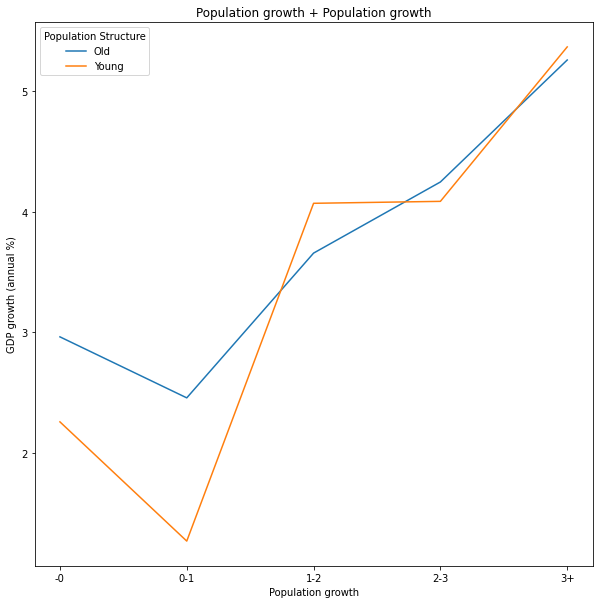

In [ ]:
# Tương tác giữa 2 biến 'Population growth','GDP growth (annual %)'.
plt.figure(figsize=(10,10))
sns.lineplot(data=data[['Population growth','GDP growth (annual %)','Population Structure']].groupby(['Population growth','Population Structure'],as_index=False).mean()
,x='Population growth',y='GDP growth (annual %)',hue='Population Structure',sort=True)
plt.title('Population growth + Population growth')

+ Nhận xét: Lựa chọn 3 thuộc tính là 'Population growth', 'Population growth' và 'Unemployment, total (% of total labor force) (modeled ILO estimate) '. Để phát triển mô hình.

## Nhóm thuộc tính tỷ trọng 3 khu vực kinh tế

### Cơ bản

<Figure size 864x504 with 0 Axes>

<AxesSubplot:xlabel='Highest GDP contribution industry rate', ylabel='count'>

Text(0.5, 1.0, 'Số lượng các có nhóm trong thuộc tính Highest GDP contribution industry rate')

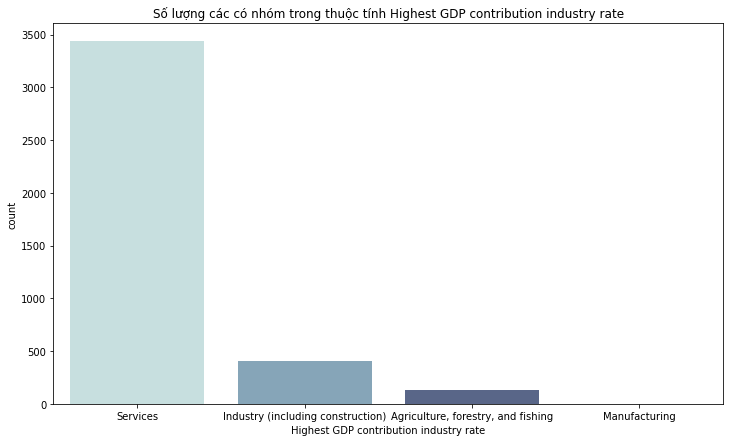

In [ ]:
# Visualization số lượng các nhóm trong thuộc tính Highest GDP contribution industry rate
plt.figure(figsize=(12,7))
sns.countplot(data=data,x='Highest GDP contribution industry rate',palette='ch:start=.2,rot=-.3')
plt.title('Số lượng các có nhóm trong thuộc tính Highest GDP contribution industry rate')

<Figure size 504x504 with 0 Axes>

<AxesSubplot:xlabel='Industry has the highest employment contribution rate', ylabel='count'>

Text(0.5, 1.0, 'Số lượng các có nhóm trong thuộc tính Industry has the highest employment contribution rate')

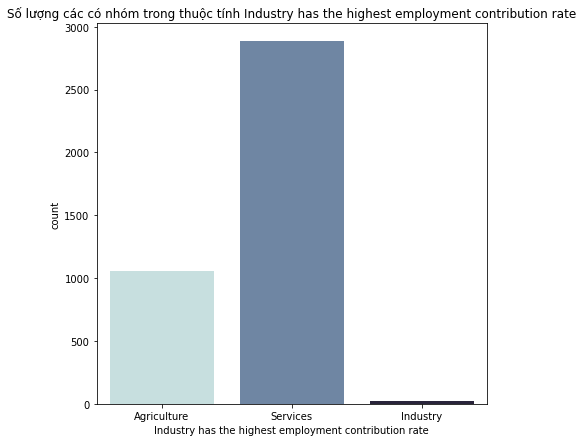

In [ ]:
# Visualization số lượng các nhóm trong thuộc tính Industry has the highest employment contribution rate
plt.figure(figsize=(7,7))
sns.countplot(data=data,x=data['Industry has the highest employment contribution rate'],palette='ch:start=.2,rot=-.3')
plt.title('Số lượng các có nhóm trong thuộc tính Industry has the highest employment contribution rate')

### Đơn biến

In [ ]:
# Box plot 'Industry has the highest employment contribution rate'
feature_list=['Industry has the highest employment contribution rate','Highest GDP contribution industry rate']

for i in feature_list:
    fig = go.Figure(data=go.Box(
        y=data['GDP growth (annual %)'],
        x=data[i],
        marker_color='darkblue',
        boxmean=True # represent mean
        )
        ,layout_yaxis_range=[-10,20]
        )
    fig.update_layout(
        width=500,
        height=700,
        xaxis_title=i,
        yaxis_title="GDP growth (annual %)")

### Đa biến

In [ ]:
# Binning dữ liệu 3 biến là 'Industry (including construction), value added (annual % growth)','Services, value added (annual % growth)','Agriculture, forestry, and fishing, value added (annual % growth)'
data_bins=data[['Industry (including construction), value added (annual % growth)','Services, value added (annual % growth)','Agriculture, forestry, and fishing, value added (annual % growth)','GDP growth (annual %)']]

for i in data_bins.columns.delete(-1):
    bins=[data_bins[i].min(),0,2,5,10,20,data_bins[i].max()]
    group_name=['-0','0-2','2-5','5-10','10-20','+20']
    data_bins[i]=pd.cut(data_bins[i],bins=bins,labels=group_name,include_lowest=True)

C:\Users\Admin\AppData\Local\Temp/ipykernel_4092/1419250442.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
# Tương tác giữa 3 biến là 'Industry (including construction), value added (annual % growth)','Services, value added (annual % growth)','Agriculture, forestry, and fishing, value added (annual % growth)'
feature_list=list(data_bins.columns.delete(-1))

for i in range(len(feature_list)-1):
    for j in range(i+1,len(feature_list)):
        fig = px.line(data_frame=data_bins.groupby([feature_list[i],feature_list[j]],as_index=False).mean()
                        ,x=feature_list[i]
                        ,y='GDP growth (annual %)'
                        ,color=feature_list[j],symbol=feature_list[j],markers=True,title="Tương tác"
                        ,width=1000, height=500)
        #fig.show()
        fig.update_layout(legend=dict(
                            yanchor="top",
                            y=0.99,
                            xanchor="left",
                            x=0.01
                            ))

+ Bình luận: Lựa chọn 4 biến là: 'Industry (including construction), value added (annual % growth)', 'Services, value added (annual % growth)','Agriculture, forestry, and fishing, value added (annual % growth), 'Manufacturing, value added (annual % growth)', 'Highest GDP contribution industry rate' và 'Manufacturing, value added (annual % growth)' để phát triển mô hình

## Giáo dục và nghiên cứu khoa học

### Cơ bản

In [ ]:
# Visualization các 
feature_list = ['Education Index','Expected Times of schooling (Times)','Mean Times of schooling (Times)','H index', 'Documents']
for i in feature_list:
    if (i=='Documents'):
        list_=['Time','Region']
        list_.append(i)
        fig=px.line(data[list_].groupby(['Time','Region'],as_index=False).sum(),x='Time',y=i,color='Region',symbol='Region',markers=True, title= 'Total '+ i,width=700, height= 500)
        #fig.update_xaxes(type='category')
        fig.show()
    else: 
        list_=['Time','Region']
        list_.append(i)
        fig=px.line(data[list_].groupby(['Time','Region'],as_index=False).mean(),x='Time',y=i,color='Region',symbol='Region',markers=True, title= i,width=700, height= 500)
        #fig.update_xaxes(type='category')
        fig.show()

#fig.update_xaxes(categoryorder='array', categoryarray= ['-0','0-1','1-2','2-3'])

## Xuất nhập khẩu

### Đơn biến

In [ ]:
# Box plot các thuộc tính
feature_list=['Type has the highest manufacturing contribution rate','Type has the highest merchandise import contribution rate'
,'Type has the highest merchandise export contribution rate','Type has the highest service export contribution rate'
,'Type has the highest service import contribution rate']

for i in feature_list:
    fig = go.Figure(data=go.Box(
    y=data['GDP growth (annual %)'],
    x=data[i],
    marker_color='darkblue',
    boxmean=True # represent mean
    )
    ,layout_yaxis_range=[-10,20])
    fig.update_layout(
    width=600,
    height=700,
    title=i,
    yaxis_title="GDP growth (annual %)")
#fig.show()

### Tương tác

In [ ]:
feature_list=['Type has the highest merchandise export contribution rate','Type has the highest manufacturing contribution rate','Type has the highest merchandise import contribution rate'
,'Type has the highest service export contribution rate'
,'Type has the highest service import contribution rate','Type has the highest commercial service export contribution rate'
,'Type has the highest commercial service import contribution rate']

for i in range(0,6):
    for j in range (i+1,7):
        list_=['GDP growth (annual %)']
        list_.extend([feature_list[i],feature_list[j]])
        fig=px.line(data[list_].groupby([feature_list[i],feature_list[j]],as_index=False).mean(),x=feature_list[i],y='GDP growth (annual %)',color=feature_list[j],symbol=feature_list[j],markers=True)
        fig.update_xaxes(type='category')
    #fig.update_xaxes(categoryorder='array', categoryarray= ['-0','0-1','1-2','2-3'])

## Các chỉ số kinh tế vĩ mô khác

In [ ]:
feature_list=['Gross value added at basic prices (GVA) (current US$)'
,'Inflation, GDP deflator (annual %)'
,'GNI growth (annual %)'
,'Stocks traded, total value (% of GDP)'
,'Consumer price index (2010 = 100)'
,'Foreign direct investment, net inflows (% of GDP)'
,'Total reserves (includes gold, current US$)'
,'Lending interest rate (%)'
,'Deposit interest rate (%)'
,'Net ODA received (% of GNI)'
,'GDP growth (annual %)']

### So sánh giữa GDP growth và GVA total

In [ ]:
# Plot thể hiện trung bình GVA trên toàn cầu
data_gva=data[['Time','Region','Gross value added at basic prices (GVA) (current US$)']]
data_gva=data_gva.groupby(['Time'],as_index=False).mean()
px.line(data_frame=data_gva,x='Time',y='Gross value added at basic prices (GVA) (current US$)',markers=True,width=700, height=500,title='mean GVA of world')

In [ ]:
# Plot thể hiện tốc độ tăng trưởng trung bình trên toàn cầu
data_target_ana=data[['Time','Region','GDP growth (annual %)']]
data_target_ana_group=data_target_ana.groupby(['Time'],as_index=False).mean()
data_target_ana_group['GDP growth (annual %)'] = data_target_ana_group['GDP growth (annual %)'].round(decimals = 2)

fig=px.line(data_target_ana_group,x='Time',y='GDP growth (annual %)', title='GDP growth (annual %) of The World',markers=True, text='GDP growth (annual %)',width=700, height=500)
fig.update_xaxes(range=[1999,2021])

### Visualize cơ bản về thuộc tính làm phát

(-5.0, 20.0)

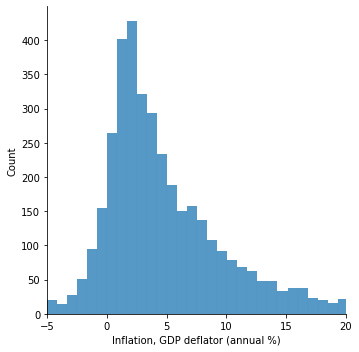

In [ ]:
# Phân phối
sns.displot(data=data,x='Inflation, GDP deflator (annual %)')
plt.xlim(-5,20)

C:\Users\Admin\AppData\Local\Temp/ipykernel_4092/2798616936.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<AxesSubplot:xlabel='Inflation, GDP deflator (annual %)', ylabel='GDP growth (annual %)'>

<Figure size 1440x720 with 0 Axes>

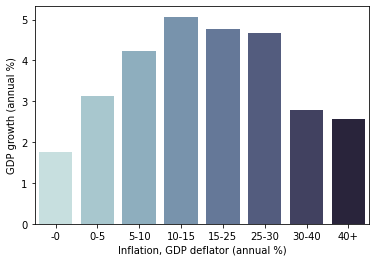

<Figure size 1440x720 with 0 Axes>

In [ ]:
# Sự khác nhau trong các nhóm giá trị lạm phát
i='Inflation, GDP deflator (annual %)'

inflation_bins=data[['Time',i,'GDP growth (annual %)']]
bins=[data[i].min(),0,5,10,15,25,30,40,data[i].max()]
group_name=['-0','0-5','5-10','10-15','15-25','25-30','30-40','40+']
inflation_bins[i]=pd.cut(inflation_bins[i],bins=bins,labels=group_name,include_lowest=True)

sns.barplot(data=inflation_bins[['Inflation, GDP deflator (annual %)','GDP growth (annual %)']].groupby(['Inflation, GDP deflator (annual %)'],as_index=False).mean()
,x='Inflation, GDP deflator (annual %)', y='GDP growth (annual %)',palette='ch:start=.2,rot=-.3')

plt.figure(figsize=(20,10))

### Visualize cơ bản về 'GNI growth (annual %)'

<AxesSubplot:xlabel='GNI growth (annual %)', ylabel='GDP growth (annual %)'>

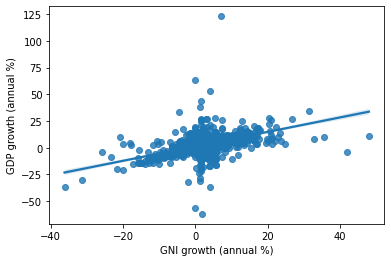

In [ ]:
# regression plot 'GNI growth (annual %)'
sns.regplot(data=data,x='GNI growth (annual %)',y='GDP growth (annual %)')

In [ ]:
# Sự tăng trưởng trung bình của các khu vực trong 21 năm qua
data_gni=data[['Time','Region','GNI growth (annual %)']]
data_gni=data_gni.groupby(['Time','Region'],as_index=False).mean()
fig=px.bar(data_gni[['Region','GNI growth (annual %)']].groupby(['Region'],as_index=False).mean(),x='Region',y='GNI growth (annual %)',width=700, height=500)
fig.show()

### Visualize về các vốn đầu tư

In [ ]:
# Sự thay đổi về tỷ lệ nhận được nguồn vốn FDI (% GDP) của các khu vực
fig=px.line(data[['Time','Region','Foreign direct investment, net inflows (% of GDP)']].groupby(['Time','Region'],as_index=False).mean(),x='Time',y='Foreign direct investment, net inflows (% of GDP)',color='Region')
fig.show()

In [ ]:
# Sự thay đổi về tỷ lệ nhận được nguồn ODA (% GDP của các nước) của các khu vực
fig=px.line(data[['Time','Region','Net ODA received (% of GNI)']].groupby(['Time','Region'],as_index=False).mean(),x='Time',y='Net ODA received (% of GNI)',color='Region')
fig.show()

# Preprocessing (Handle Outlier) - Step 5

In [ ]:
data_c=data.copy() # Tạo một bản copy

In [ ]:
# Tìm IQR 
Q1 = data_c.iloc[:,4:].quantile(0.25)
Q3 = data_c.iloc[:,4:].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Unemployment, total (% of total labor force) (modeled ILO estimate)    6.960000e+00
Labor force, total                                                     9.072302e+06
Life expectancy index                                                  1.880000e-01
Life expectancy at birth (Times)                                       1.220000e+01
Agriculture, forestry, and fishing, value added (annual % growth)      7.092739e+00
Industry (including construction), value added (annual % growth)       7.398530e+00
Services, value added (annual % growth)                                4.681941e+00
Manufacturing, value added (annual % growth)                           7.353916e+00
Gross value added at basic prices (GVA) (current US$)                  1.175558e+11
Total natural resources rents (% of GDP)                               7.827067e+00
Inflation, GDP deflator (annual %)                                     6.442316e+00
GNI growth (annual %)                                                  4.648

In [ ]:
# Thay thế những giá trị outlier bằng giá trị min và max
for i in data_c.iloc[:,4:].select_dtypes(exclude=object).columns:
    lower=Q1[i]-1.5*IQR[i]
    upper=Q3[i]+1.5*IQR[i]
    print(lower, upper)
    data_c[i]=np.where(data_c[i]<lower,lower,np.where(data_c[i]>upper,upper,data_c[i]))
    

-6.660000000000002 21.18
-12603576.25 23685633.75
0.39600000000000013 1.148
45.79999999999999 94.6
-11.96037469019597 16.410583118560968
-11.391576086835958 18.2025426855841
-5.401874557843319 13.3258908336774
-11.587733682287189 17.827929694329622
-171787299272.4649 298435801817.74457
-11.619104401910505 19.68916466365339
-8.298421758531418 17.47084409664162
-5.6450459630133025 12.94766222571257
-59.82197498909264 103.29668585354918
-39.39323699567413 141.16692883034736
34.64777615710398 160.7722083952272
-11.213416761480255 20.083691170127636
-6.100220706010395 13.480768400911092
-222.87276072609666 377.51101984084517
-35850018313.00993 61436249150.23804
-30.209954579749123 128.1094816970034
-24.278771417976245 191.63511020053772
-6.718294461065223 29.930087787750175
-5.874999999999999 16.325
-219.96680298749993 738.2172591125
-235.25555772499996 706.3939006749999
0.061499999999999944 1.1615
-5699.75 9622.25
-275.0 629.0
4.6 20.6
-2.6499999999999995 18.549999999999997
-5.716109785285

In [ ]:
data=data_c

# Build Model - Step 6

## Neural Network 5 layer (Input layer,2 Hidden Layer, Output layer)

### Tiền xử lý và chuẩn bị tập train test

In [ ]:
feature_select=['Time','Population Structure', 'Population growth', 
'Unemployment, total (% of total labor force) (modeled ILO estimate)', 
'Highest GDP contribution industry rate', 'Agriculture, forestry, and fishing, value added (annual % growth)', 
'Industry (including construction), value added (annual % growth)', 'Services, value added (annual % growth)',
'Manufacturing, value added (annual % growth)', 'Gross value added at basic prices (GVA) (current US$)', 
'Inflation, GDP deflator (annual %)', 'GNI growth (annual %)',
'Net ODA received (% of GNI)','Foreign direct investment, net inflows (% of GDP)',
'Deposit interest rate (%)','Lending interest rate (%)'
,'GDP growth (annual %)']

In [ ]:
data_c=data[feature_select].copy() # Tạo một bản sao

In [ ]:
# One hot Encoding
def onehotencode(df,colNames):
    for col in colNames:
        if( df[col].dtype == np.dtype('object')):
            dummies = pd.get_dummies(df[col],prefix=col)
            df = pd.concat([df,dummies],axis=1)

            #drop the encoded column
            df.drop([col],axis = 1 , inplace=True)
    return df
    
data_c = onehotencode(data_c, data_c.columns)

In [ ]:
# Tạo tập train và test
train=data_c.loc[np.logical_and(data['Time']!=2020,data['Time']!=2019),]

test_2020=data_c.loc[data['Time']==2020,]
test_2019=data_c.loc[data['Time']==2019,]
test_2019_2020=data_c.loc[np.logical_or(data['Time']==2019,data['Time']==2020),]

In [ ]:
# Tao x_train, y_train, x_test, y_test
y_train=train.loc[:,'GDP growth (annual %)']
X_train=train.drop(columns=['GDP growth (annual %)','Time'],axis=1)
X_train=X_train.iloc[:,:]

y_test_2020=test_2020.loc[:,'GDP growth (annual %)']
X_test_2020=test_2020.drop(columns=['GDP growth (annual %)','Time'],axis=1)
X_test_2020=X_test_2020.iloc[:,:]

y_test_2019=test_2019.loc[:,'GDP growth (annual %)']
X_test_2019=test_2019.drop(columns=['GDP growth (annual %)','Time'],axis=1)
X_test_2019=X_test_2019.iloc[:,:]

y_test_2019_2020=test_2019_2020.loc[:,'GDP growth (annual %)']
X_test_2019_2020=test_2019_2020.drop(columns=['GDP growth (annual %)','Time'],axis=1)
X_test_2019_2020=X_test_2019_2020.iloc[:,:]

### Xây dựng mô hình

In [ ]:
# Normalize
from sklearn.preprocessing import MinMaxScaler
scalar=MinMaxScaler()
scalar=scalar.fit(X_train)

X_train=scalar.transform(X_train)
X_test_2019=scalar.transform(X_test_2019)
X_test_2020=scalar.transform(X_test_2020)
X_test_2019_2020=scalar.transform(X_test_2019_2020)

In [ ]:
# Xây dựng mô hình
from keras.models import Sequential
model = Sequential()

In [ ]:
from keras.layers import Dense, Activation
from tensorflow.keras.regularizers import l2
from tensorflow.keras.initializers import Ones
#kernel_initializer=Ones()

model.add(Dense(128,input_dim = X_train.shape[1],kernel_regularizer=l2(0.01),activation='relu'))
model.add(Dense(256,kernel_regularizer=l2(0.01),activation='relu'))
model.add(Dense(256,kernel_regularizer=l2(0.01),activation='relu'))
model.add(Dense(256,kernel_regularizer=l2(0.01),activation='relu'))
model.add(Dense(1,kernel_regularizer=l2(0.01),activation='linear'))

model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_60 (Dense)            (None, 128)               3072      
                                                                 
 dense_61 (Dense)            (None, 256)               33024     
                                                                 
 dense_62 (Dense)            (None, 256)               65792     
                                                                 
 dense_63 (Dense)            (None, 256)               65792     
                                                                 
 dense_64 (Dense)            (None, 1)                 257       
                                                                 
Total params: 167,937
Trainable params: 167,937
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from tensorflow.keras.optimizers import SGD
#SGD
optimizer=SGD(learning_rate=0.01)

from tensorflow.keras.losses import MeanSquaredError
loss=MeanSquaredError()

model.compile(optimizer=optimizer,loss=loss,metrics=['mean_squared_error'])

In [ ]:
history=model.fit(X_train,y_train, epochs=300, batch_size=64,validation_split = 0.2)

Epoch 1/300
45/45 [==============================] - 1s 6ms/step - loss: 19.1208 - mean_squared_error: 11.9167 - val_loss: 11.9770 - val_mean_squared_error: 4.8206
Epoch 2/300
45/45 [==============================] - 0s 3ms/step - loss: 15.6483 - mean_squared_error: 8.5458 - val_loss: 12.1225 - val_mean_squared_error: 5.0704
Epoch 3/300
45/45 [==============================] - 0s 3ms/step - loss: 14.5143 - mean_squared_error: 7.5200 - val_loss: 10.5946 - val_mean_squared_error: 3.6552
Epoch 4/300
45/45 [==============================] - 0s 3ms/step - loss: 13.3972 - mean_squared_error: 6.5097 - val_loss: 9.9872 - val_mean_squared_error: 3.1557
Epoch 5/300
45/45 [==============================] - 0s 3ms/step - loss: 13.3115 - mean_squared_error: 6.5292 - val_loss: 15.4197 - val_mean_squared_error: 8.7028
Epoch 6/300
45/45 [==============================] - 0s 3ms/step - loss: 12.5379 - mean_squared_error: 5.8546 - val_loss: 10.8201 - val_mean_squared_error: 4.1949
Epoch 7/300
45/45 [===

Text(0.5, 1.0, 'model mean_squared_error')

Text(0, 0.5, 'mean_squared_error')

Text(0.5, 0, 'epoch')

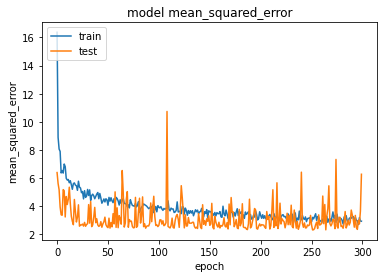

In [ ]:
# mean_squared_error
import matplotlib.pyplot as plt 
plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['val_mean_squared_error'])
plt.title('model mean_squared_error')
plt.ylabel('mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Text(0.5, 1.0, 'model loss')

Text(0, 0.5, 'loss')

Text(0.5, 0, 'epoch')

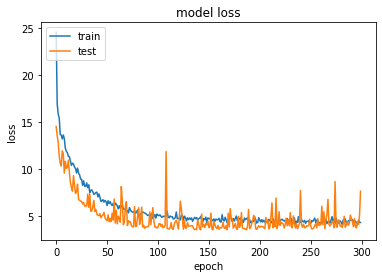

In [ ]:
# Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Random Forest

### Tiền xử lý và chuẩn bị tập train test

In [ ]:
feature_select=['Time','Population Structure', 'Population growth', 
'Unemployment, total (% of total labor force) (modeled ILO estimate)', 
'Highest GDP contribution industry rate', 'Agriculture, forestry, and fishing, value added (annual % growth)', 
'Industry (including construction), value added (annual % growth)', 'Services, value added (annual % growth)',
'Manufacturing, value added (annual % growth)', 'Gross value added at basic prices (GVA) (current US$)', 
'Inflation, GDP deflator (annual %)', 'GNI growth (annual %)',
'Net ODA received (% of GNI)','Foreign direct investment, net inflows (% of GDP)',
'Deposit interest rate (%)','Lending interest rate (%)'
,'GDP growth (annual %)']

In [ ]:
df=data[feature_select]

In [ ]:
# Label Encode
from sklearn import preprocessing
LE = preprocessing.LabelEncoder()
training_features = [feature for feature in feature_select if (df[feature].dtype != object)]

encode_dict = {} # biến dictionary lưu trữ label cùng giá trị tương ứng

for feature in feature_select:
  if (df[feature].dtype == object):
    feature_label = feature + " label"
    training_features.append(feature_label)
    df[feature_label] = LE.fit_transform(df[feature])
    le_name_mapping = dict(zip(LE.classes_, LE.transform(LE.classes_)))
    encode_dict[feature] = le_name_mapping

training_features # biến list chứa các thuộc tính dùng để train, là feature_select nhưng loại bỏ 'GDP growth (annual %)'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



['Time',
 'Unemployment, total (% of total labor force) (modeled ILO estimate)',
 'Agriculture, forestry, and fishing, value added (annual % growth)',
 'Industry (including construction), value added (annual % growth)',
 'Services, value added (annual % growth)',
 'Manufacturing, value added (annual % growth)',
 'Gross value added at basic prices (GVA) (current US$)',
 'Inflation, GDP deflator (annual %)',
 'GNI growth (annual %)',
 'Consumer price index (2010 = 100)',
 'Net ODA received (% of GNI)',
 'Foreign direct investment, net inflows (% of GDP)',
 'Deposit interest rate (%)',
 'Lending interest rate (%)',
 'GDP growth (annual %)',
 'Population Structure label',
 'Population growth label',
 'Highest GDP contribution industry rate label']

In [ ]:
# Tao x_train, y_train, x_test, y_test

X_train_2=df[training_features].loc[np.logical_and(df['Time']!=2019,df['Time']!=2020),]
y_train_2=df[training_features].loc[np.logical_and(df['Time']!=2019,df['Time']!=2020),'GDP growth (annual %)']
X_train_2.drop(columns=['Time','GDP growth (annual %)'],inplace=True)

X_test_2019_2020_2=df[training_features].loc[np.logical_or(df['Time']==2019,df['Time']==2020),]
y_test_2019_2020_2=df[training_features].loc[np.logical_or(df['Time']==2019,df['Time']==2020),'GDP growth (annual %)']
X_test_2019_2020_2.drop(columns=['Time', 'GDP growth (annual %)'],inplace=True)

X_test_2019_2=df[training_features].loc[df['Time']==2019,]
y_test_2019_2=df[training_features].loc[df['Time']==2019,'GDP growth (annual %)']
X_test_2019_2.drop(columns=['Time','GDP growth (annual %)'],inplace=True)

X_test_2020_2=df[training_features].loc[df['Time']==2020,]
y_test_2020_2=df[training_features].loc[df['Time']==2020,'GDP growth (annual %)']
X_test_2020_2.drop(columns=['Time', 'GDP growth (annual %)'],inplace=True)

### Xây dựng mô hình

In [ ]:
from sklearn.ensemble import RandomForestRegressor

model_2=RandomForestRegressor(n_estimators = 50,
                             max_depth = 6,
                             min_weight_fraction_leaf = 0.05,
                             max_features = 0.8,
                             random_state = 42)
model_2.fit(X_train_2, y_train_2)

RandomForestRegressor(max_depth=6, max_features=0.8,
                      min_weight_fraction_leaf=0.05, n_estimators=50,
                      random_state=42)

# Đánh giá và kết quả dự đoán mô hình. Xây dựng hàm dự báo tăng trưởng GDP của một quốc gia - Step 7

## Neural Network 5 layer (Input, 2 Hidden Layer, Output)

### Đánh giá

In [ ]:
# Tập train
y_pred=model.predict(X_train)
from sklearn.metrics import mean_squared_error

mean_squared_error(y_train,y_pred,squared=False)

1.7709967313385453

In [ ]:
# Đánh giá giai đoạn 2019
y_pred=model.predict(X_test_2019)
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test_2019,y_pred,squared=False)

1.7155264696715251

In [ ]:
# Đánh giá giai đoạn 2020
y_pred=model.predict(X_test_2020)
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test_2020,y_pred,squared=False)

2.962817878891122

In [ ]:
# Đánh giá chung cả 2 giai đoạn
y_pred=model.predict(X_test_2019_2020)
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test_2019_2020,y_pred,squared=False)

2.4208800932326797

### Kết quả dự đoán

In [ ]:
y_pred = model.predict(X_test_2019_2020)
result = data.loc[np.logical_or(data['Time']==2019,data['Time']==2020),['Time','Country Name','GDP growth (annual %)']].assign(Predicted = y_pred)

In [ ]:
result

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).



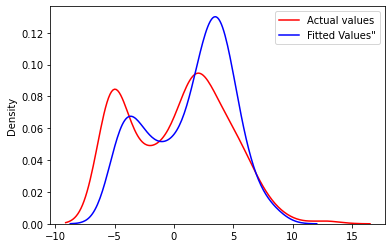

In [ ]:
# distribution plot of predicted and real values
ax1 = plt.axes()
sns.distplot(data.loc[np.logical_or(data['Time']==2019,data['Time']==2020),['GDP growth (annual %)']], hist = False, color = "r", label = "Actual Value",ax=ax1)
sns.distplot(y_pred, hist = False, color = "b", label = "Fiited Values", ax = ax1)
ax1.legend(labels=['Actual values','Fitted Values"'])

## Random Forest

### Đánh giá

In [ ]:
# Tập train
y_pred_2=model_2.predict(X_train_2)
from sklearn.metrics import mean_squared_error

mean_squared_error(y_train_2,y_pred_2,squared=False)

2.12610506956267

In [ ]:
# Đánh giá giai đoạn 2019
y_pred_2=model_2.predict(X_test_2019_2)
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test_2019_2,y_pred_2,squared=False)


1.8120022925864836

In [ ]:
# Đánh giá giai đoạn 2020
y_pred_2=model_2.predict(X_test_2020_2)
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test_2019_2,y_pred_2,squared=False)

4.333768116971549

In [ ]:
# Đánh giá chung cả 2 giai đoạn
y_pred_2=model_2.predict(X_test_2019_2020_2)
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test_2019_2020_2,y_pred_2,squared=False)

2.96325557503225

### Kết quả dự đoán của mô hình

In [ ]:
y_pred = model_2.predict(X_test_2019_2020_2)
result_2 = data.loc[np.logical_or(data['Time']==2019,data['Time']==2020),['Time','Country Name','GDP growth (annual %)']].assign(Predicted = y_pred)

In [ ]:
result_2

,Time,Country Name,GDP growth (annual %),Predicted
3591,2019.0,Afghanistan,3.911603,4.478762
3592,2019.0,Albania,2.173692,4.371306
3593,2019.0,Algeria,0.800000,0.813915
3594,2019.0,Angola,-0.624644,-4.098343
3595,2019.0,Antigua and Barbuda,3.351161,1.601726
3596,2019.0,Argentina,-2.088015,-3.600070
3597,2019.0,Armenia,7.600000,6.046737
3598,2019.0,Aruba,6.406830,2.006093
3599,2019.0,Australia,2.160956,2.326788
3600,2019.0,Austria,1.418734,1.223590


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).



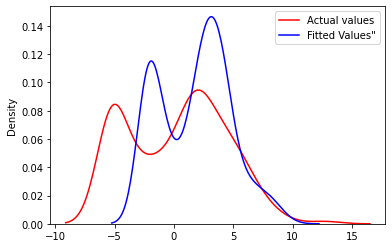

In [ ]:
# # distribution plot of predicted and real values
ax1 = plt.axes()
sns.distplot(data.loc[np.logical_or(data['Time']==2019,data['Time']==2020),['GDP growth (annual %)']], hist = False, color = "r", label = "Actual Value",ax=ax1)
sns.distplot(y_pred_2, hist = False, color = "b", label = "Fiited Values", ax = ax1)
ax1.legend(labels=['Actual values','Fitted Values"'])

## Xây dựng mô hình dự báo sự tăng trưởng GDP của một quốc gia

In [ ]:
# Hàm tìm hệ số phù hợp p,d,q
from statsmodels.tsa.arima.model import ARIMA
import pmdarima as pm

def finding_the_optimal_parameters(country_name):
    smodel = pm.auto_arima(data.loc[data['Country Name']==country_name,'GDP growth (annual %)'], start_p=0, start_q=0,max_p=5, max_q=5, m=12,start_P=0, seasonal=False,d=0,
                           D=0, trace=True,error_action='ignore',  suppress_warnings=True, stepwise=True)
    print(smodel.summary())

In [ ]:
# hàm dự đoán
def forecast (country_name):
  finding_the_optimal_parameters(country_name)
  print('Bạn đã tìm được hệ số x, y, z cho mô hình')
  x=int(input('X = '))
  y=int(input('Y = '))
  z=int(input('Z = '))
  model=ARIMA(data.loc[data['Country Name']==country_name,'GDP growth (annual %)'],order=(x,y,z))
  model=model.fit()
  model.summary()
  fc=model.forecast(5, alpha=0.05) # 95% conf
  fc=pd.Series(fc.values, index=[2021,2022,2023,2024,2025])
  print(f'Kết quả dự đoán tron 5 năm tới của {country_name}: {fc}')

In [ ]:
forecast(country_name='China')

C:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\pmdarima\arima\_validation.py:62: UserWarning: m (12) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=153.570, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=78.053, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.11 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=78.711, Time=0.05 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=76.603, Time=0.11 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=78.579, Time=0.11 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=78.546, Time=0.05 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=inf, Time=0.25 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=80.484, Time=0.12 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=76.443, Time=0.17 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=86.464, Time=0.08 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=77.871, Time=0.06 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=78.441, Time=0.23 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=78.438, Time=0.23 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=99.201, Time=0.03 sec
 A

C:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as st